In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import siglib

Define Constants
---

In [2]:
from siglib import data_m

results = []
min_depth = 100; clonality = (0, 0.4); notation = 'pyrimidine'

EG10gff_file = '/home/clint/essigmann_analysis/AFB1/data/EG10_corrected.gff'
EG10fasta_file = '/home/clint/essigmann_analysis/AFB1/data/EG10_corrected.fasta'
merfile = '/home/clint/essigmann_analysis/AFB1/data/EG10_slice_counts.jf'

Read in Trinucleotide Frequencies of Reference Genome
---

In [3]:
from jellywrap import Jellyfish

j = Jellyfish()
_ = j.read_mer_file(merfile)

Parse all Files and Plot Mutations *per* Genomic Position
---

Sample: 1798
Found 50 Mutations
Sample: 3497-1440L
Found 65 Mutations
Sample: 3497-1483L
Found 50 Mutations
Sample: 3497-1488L
Found 59 Mutations
Sample: 6210
Found 1713 Mutations
Sample: 6211
Found 1699 Mutations
Sample: 6212
Found 51 Mutations
Sample: 6213
Found 2758 Mutations
Sample: 1795
Found 43 Mutations
Sample: 3494-1440L
Found 15 Mutations
Sample: 3494-1483L
Found 17 Mutations
Sample: 3494-1488L
Found 46 Mutations
Sample: 4510
Found 324 Mutations
Sample: 4511
Found 216 Mutations


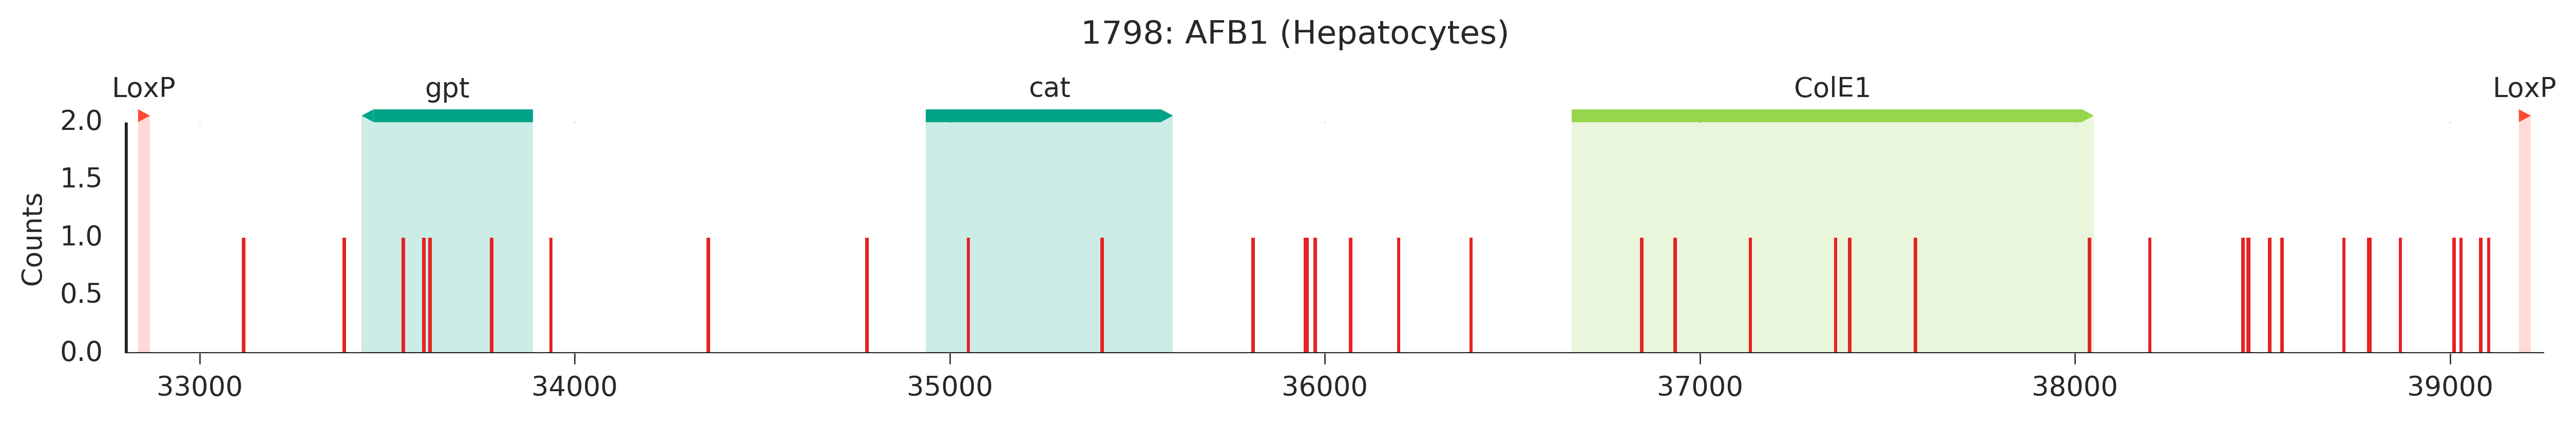

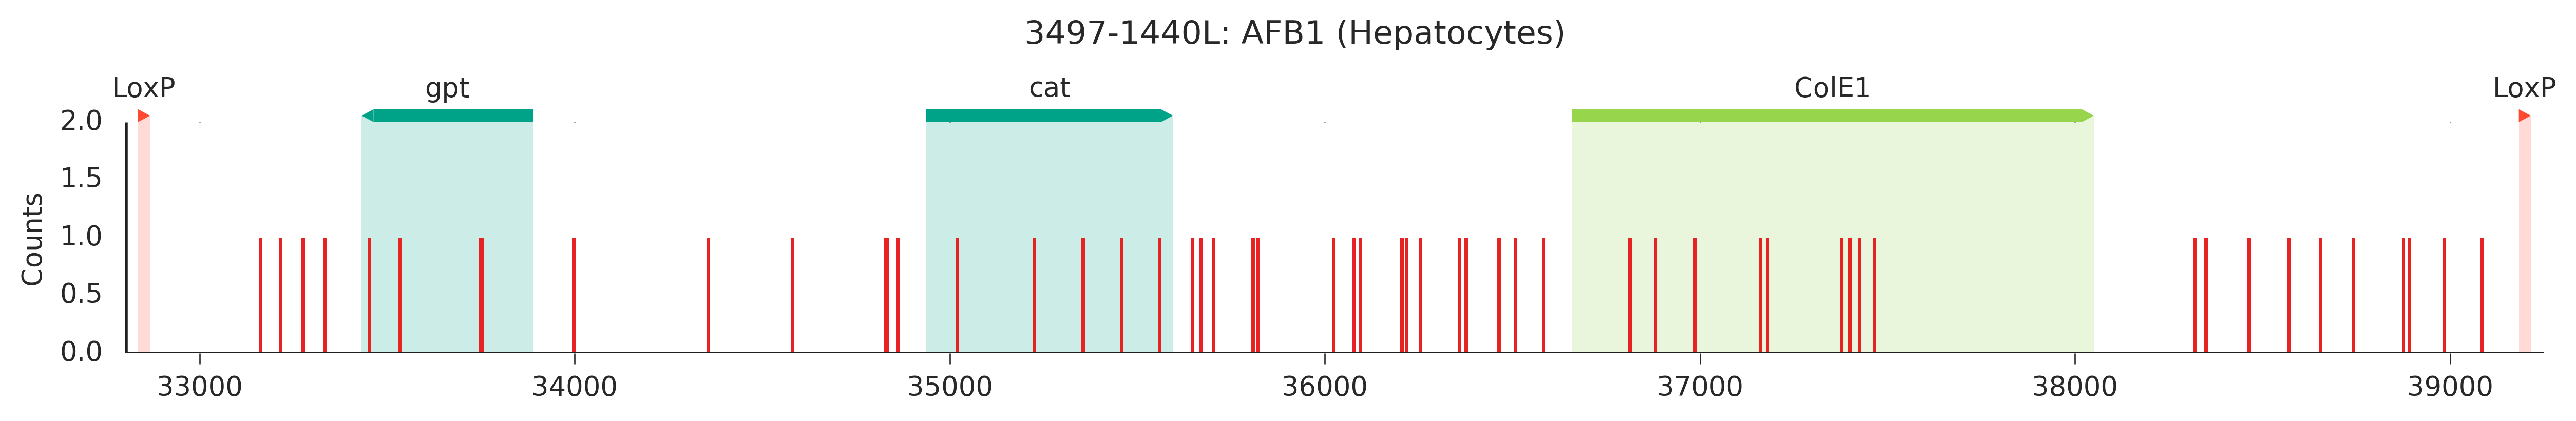

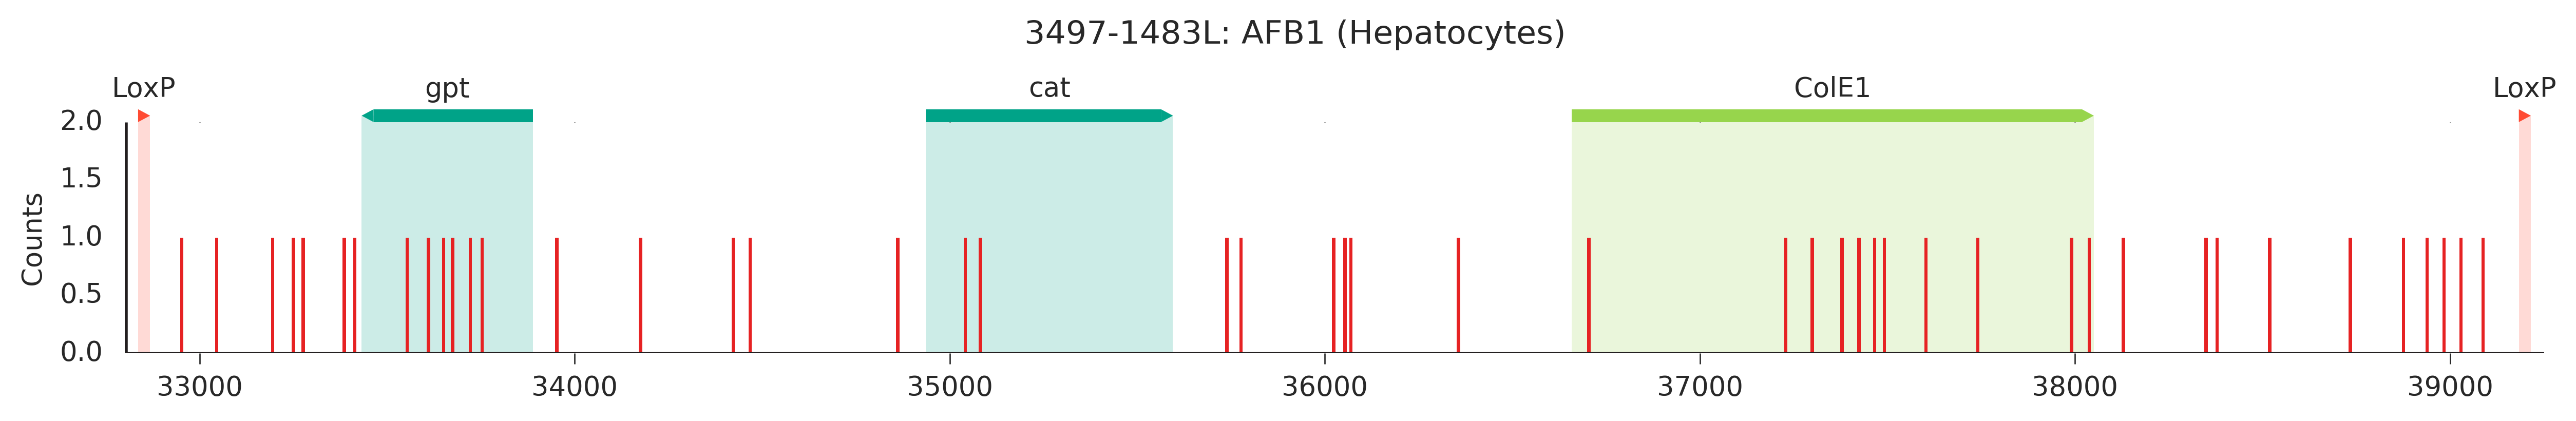

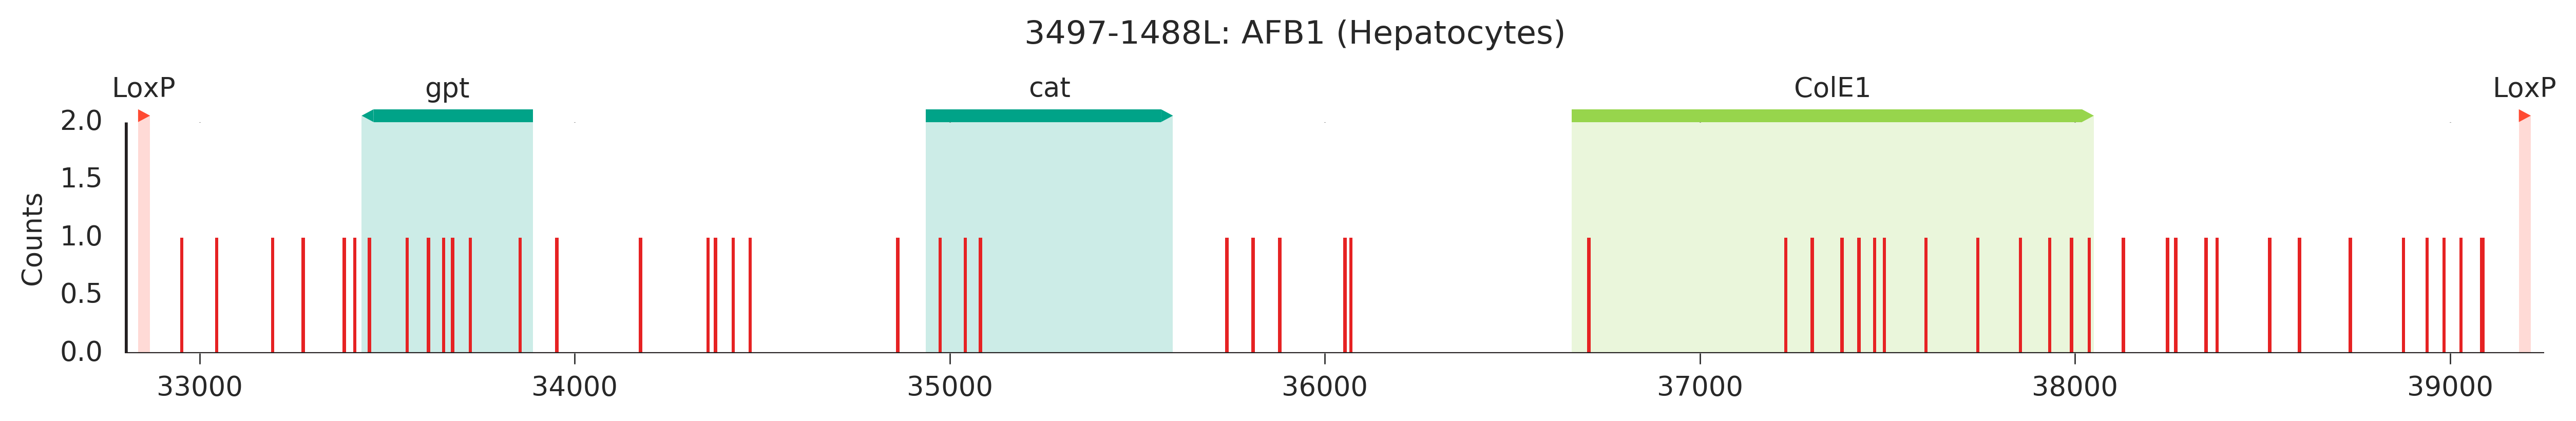

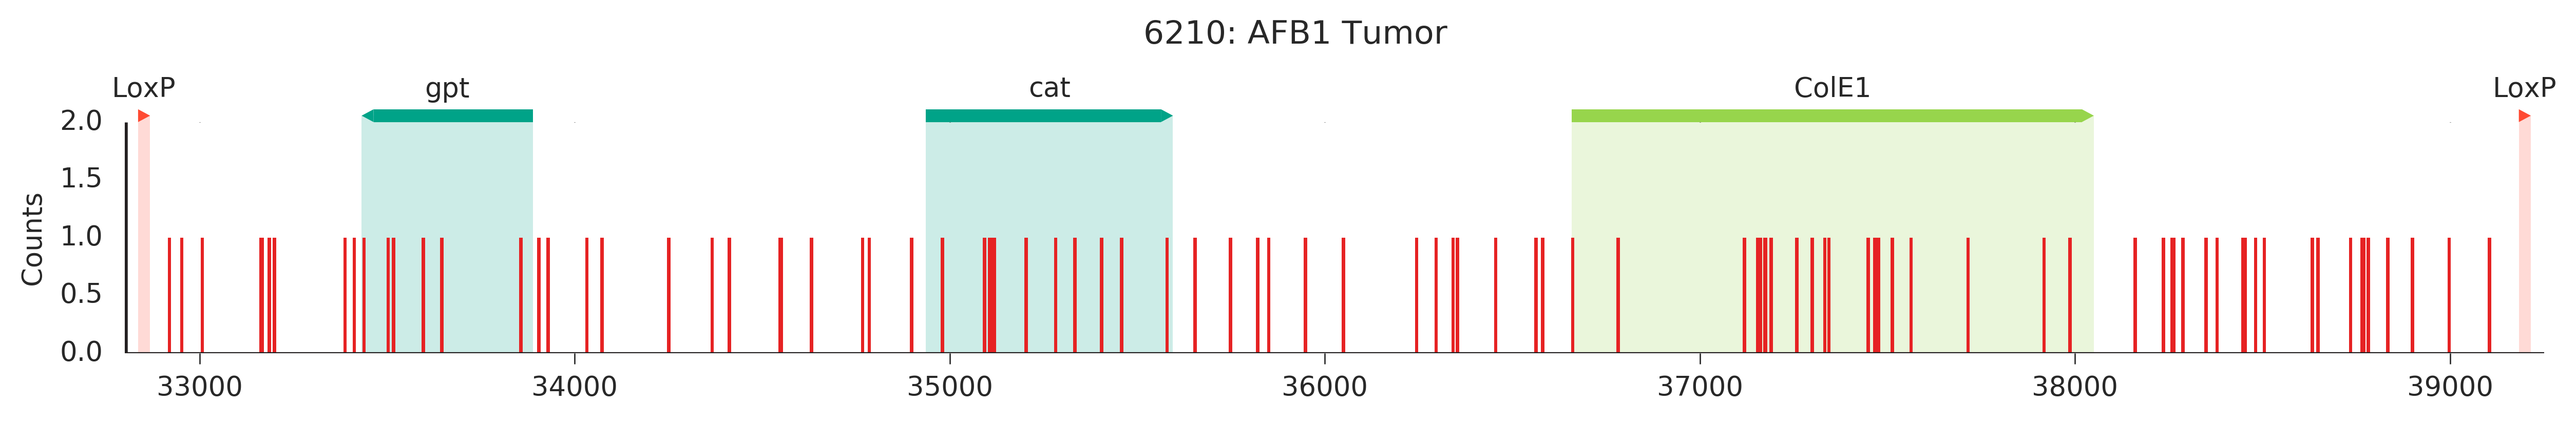

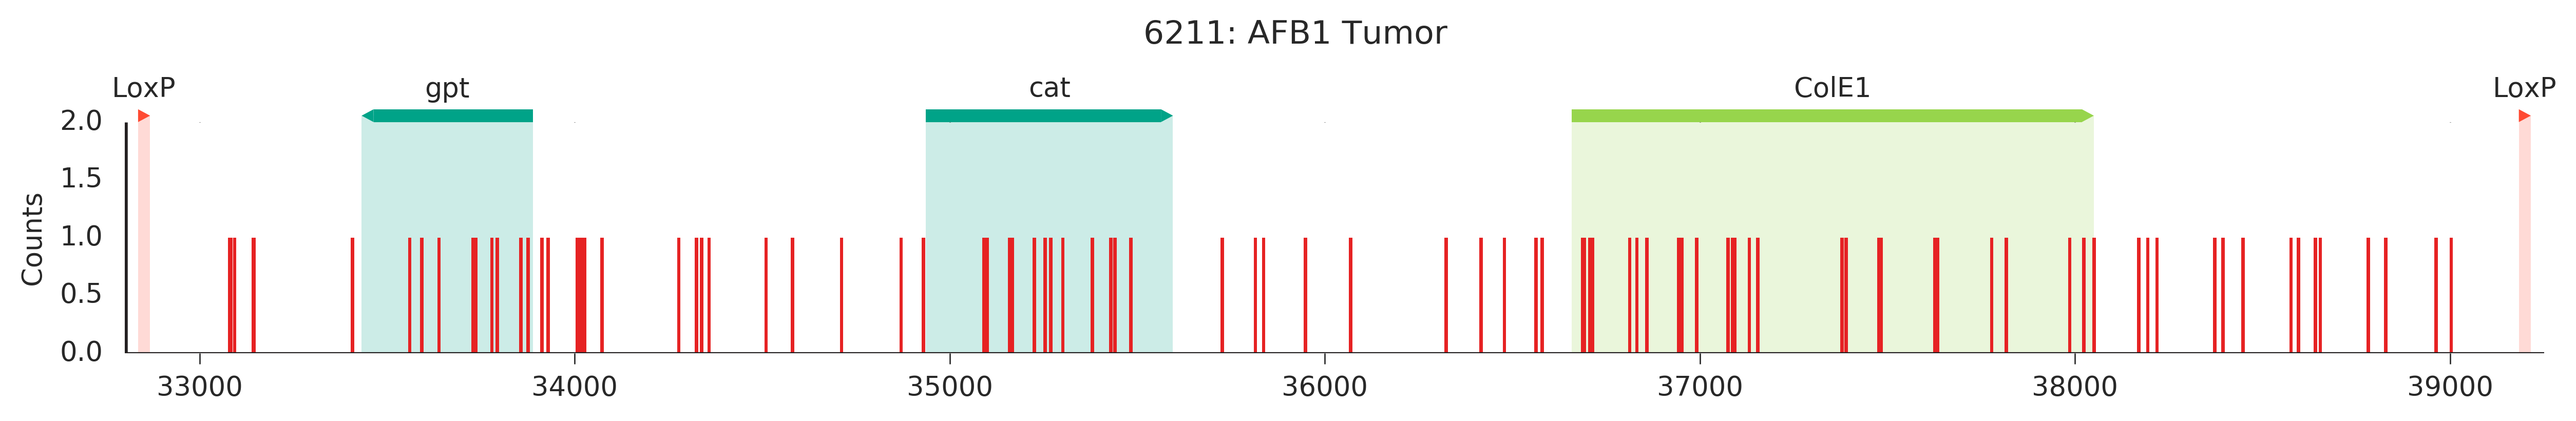

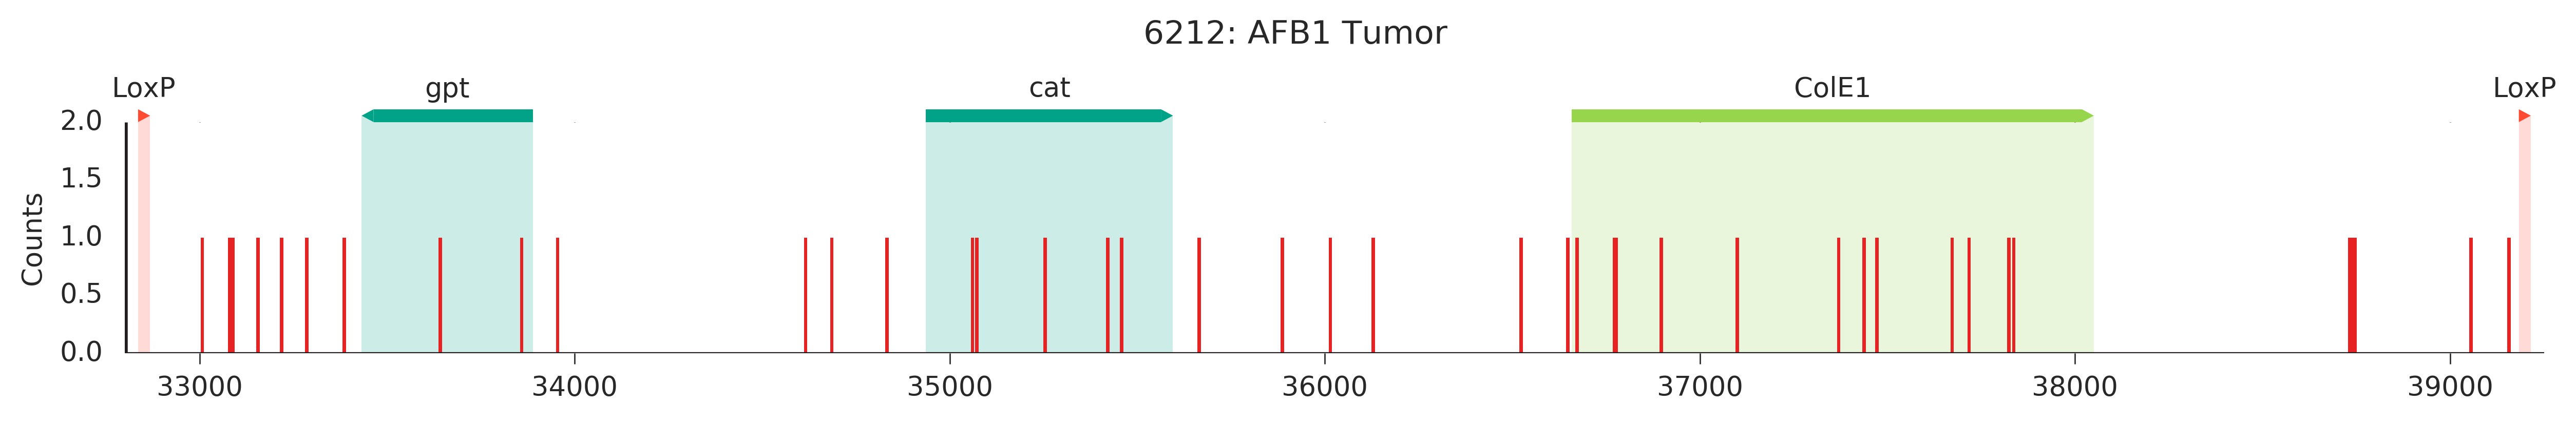

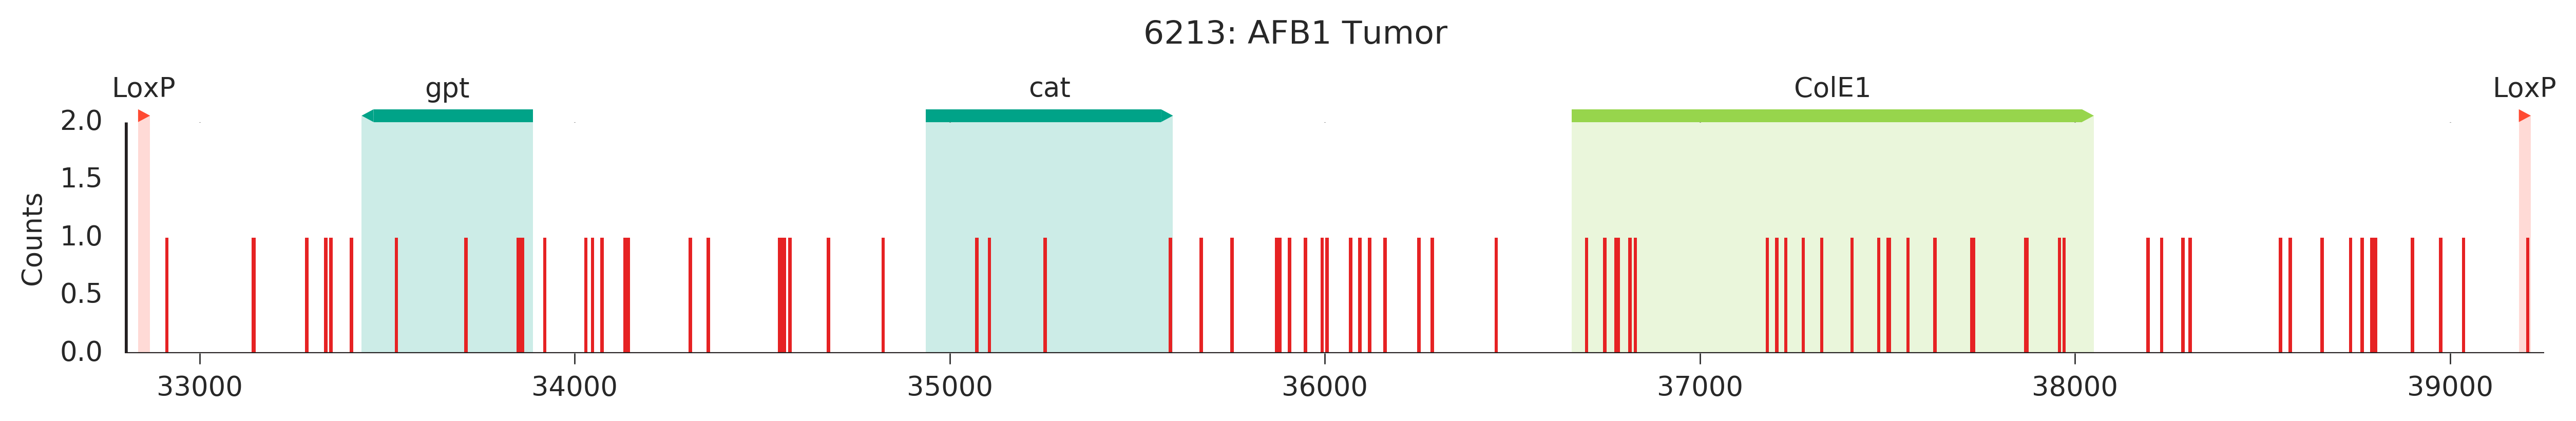

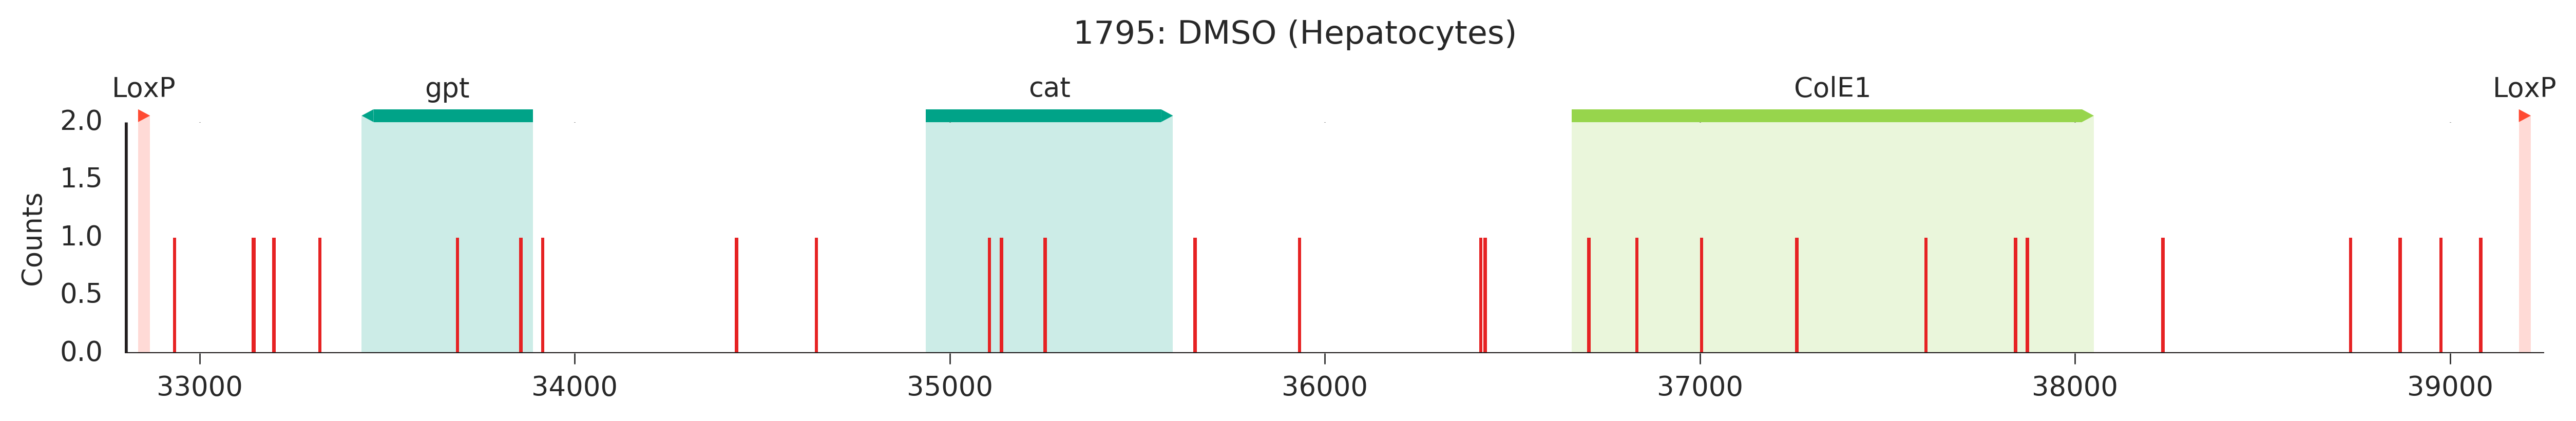

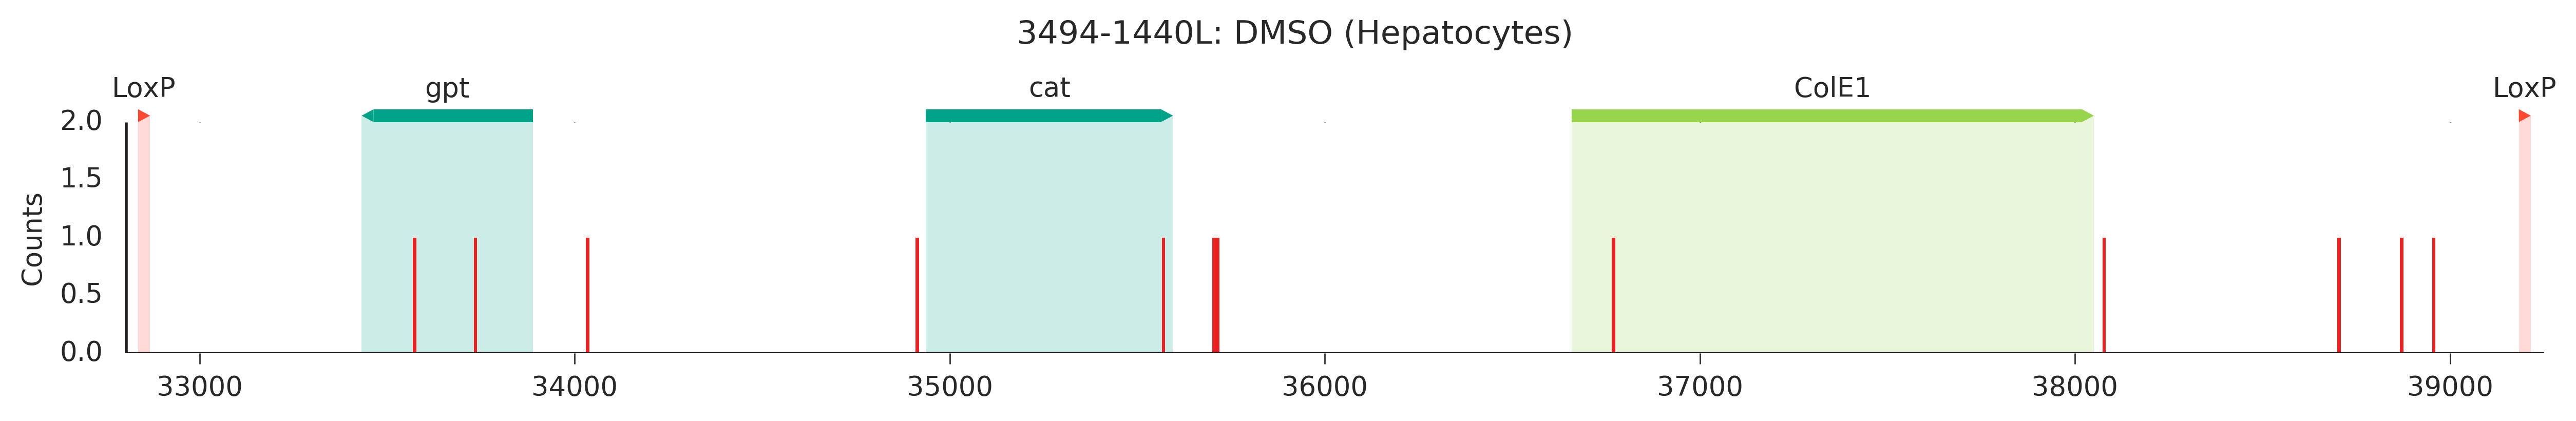

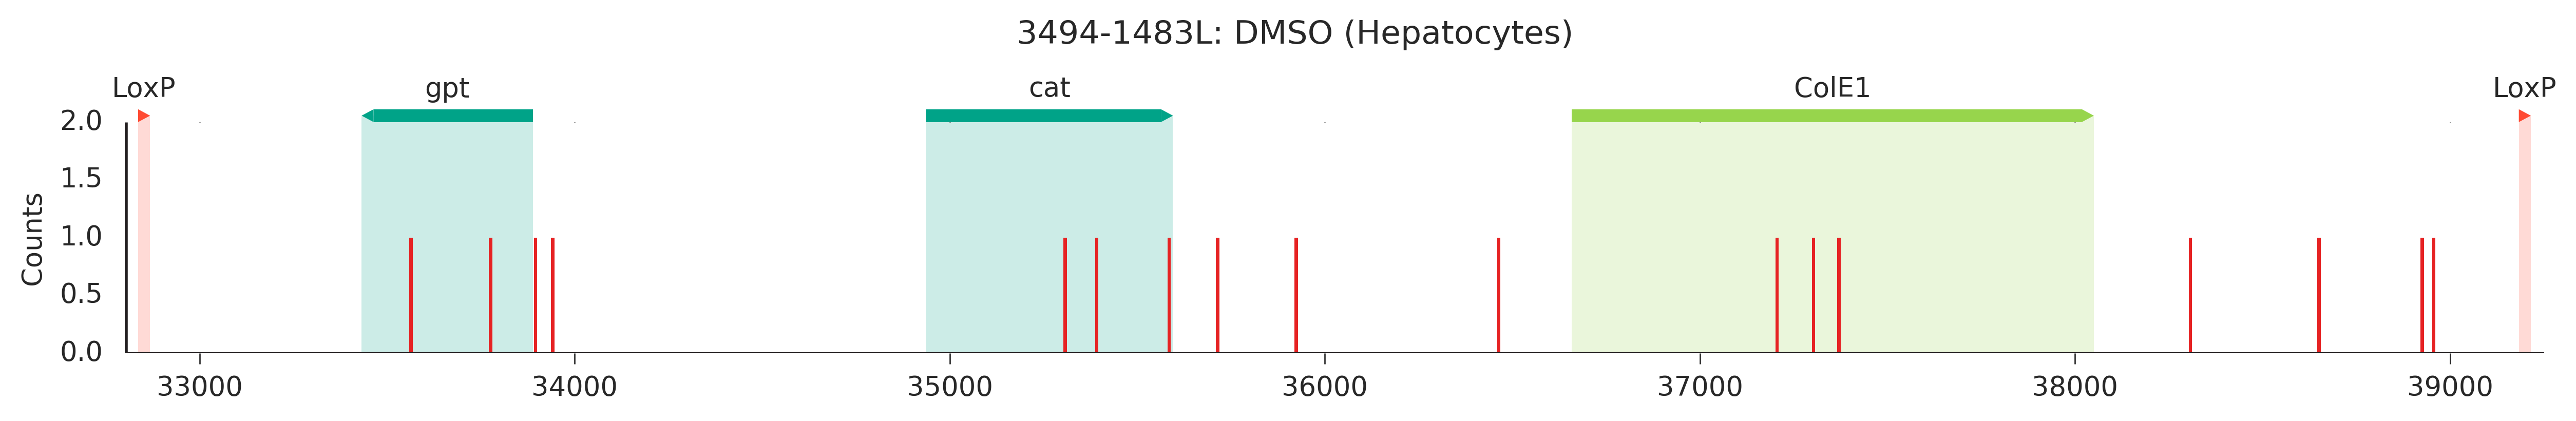

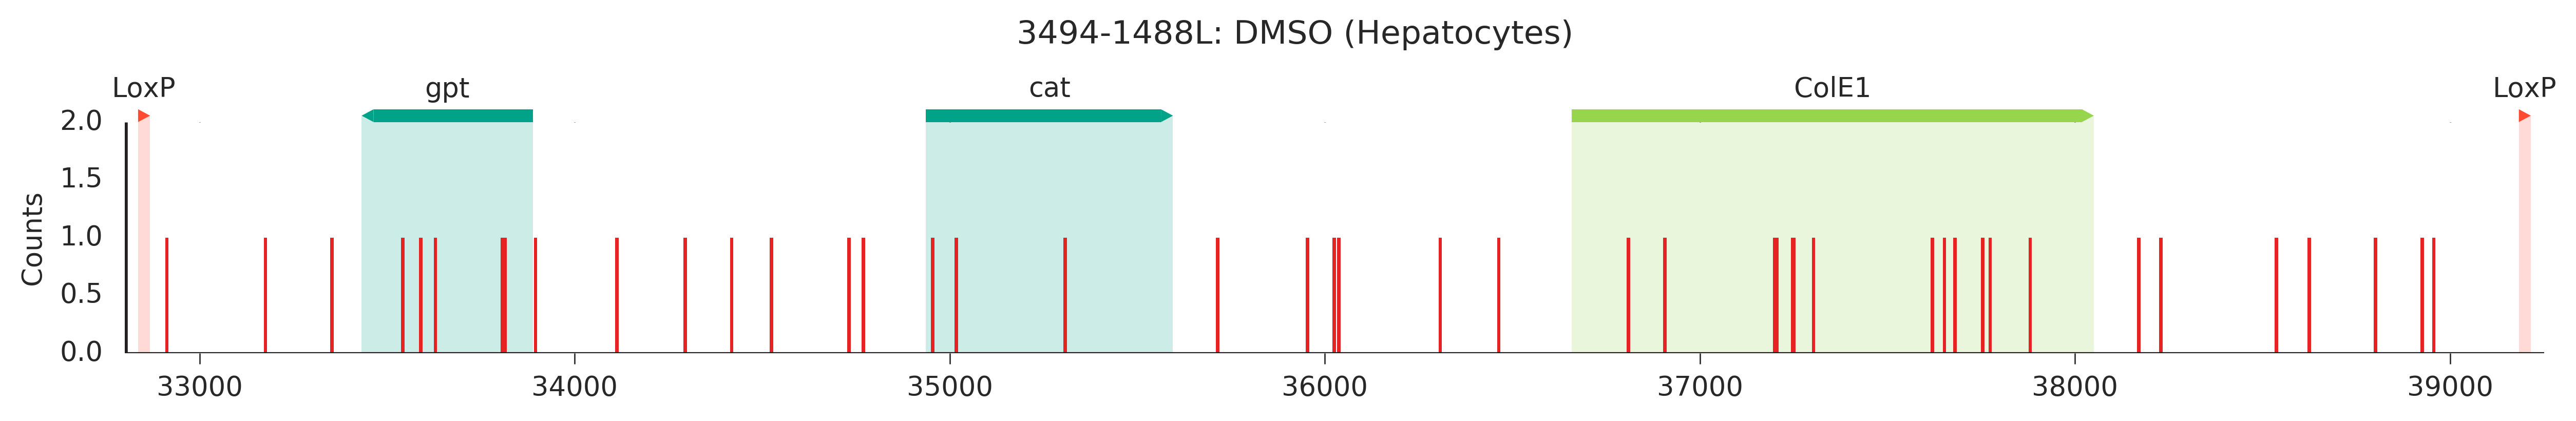

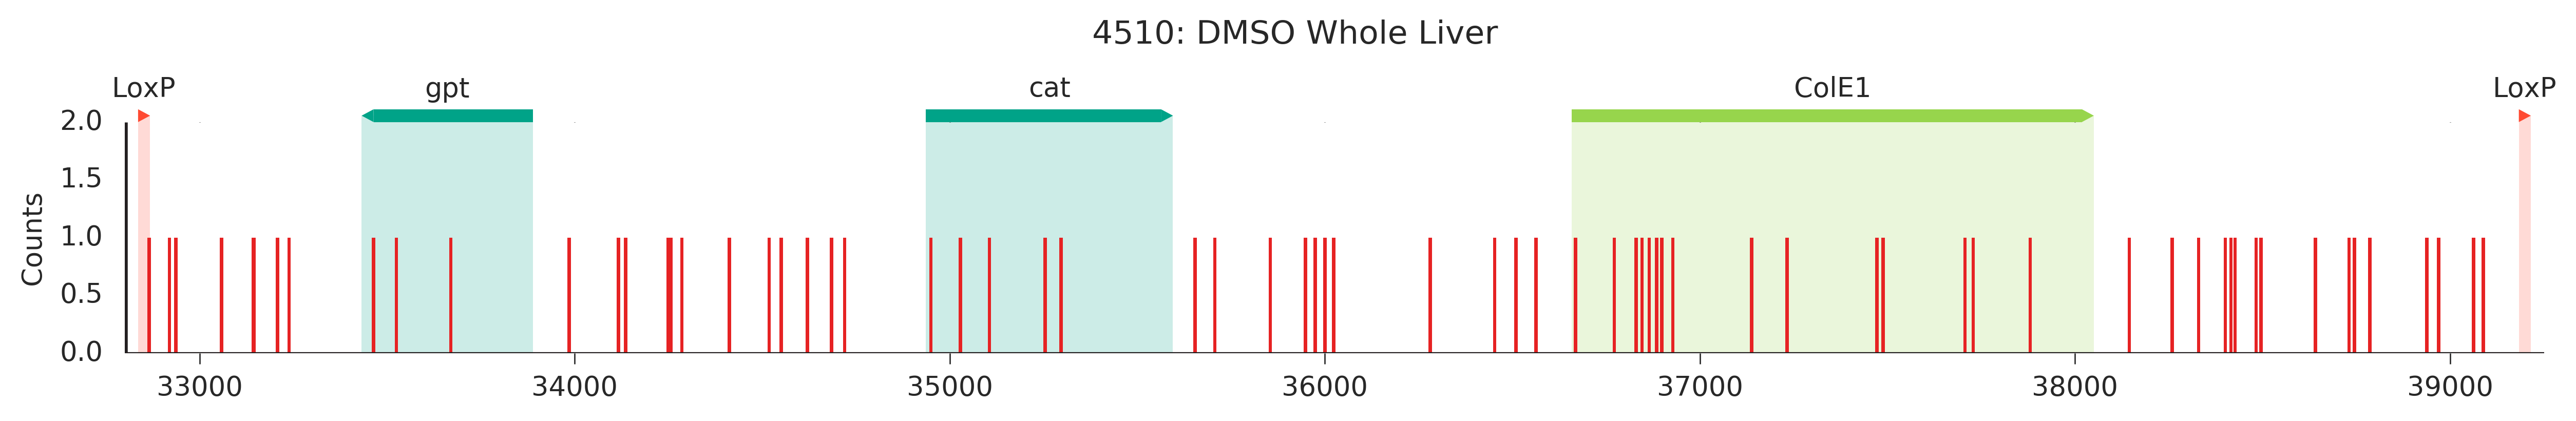

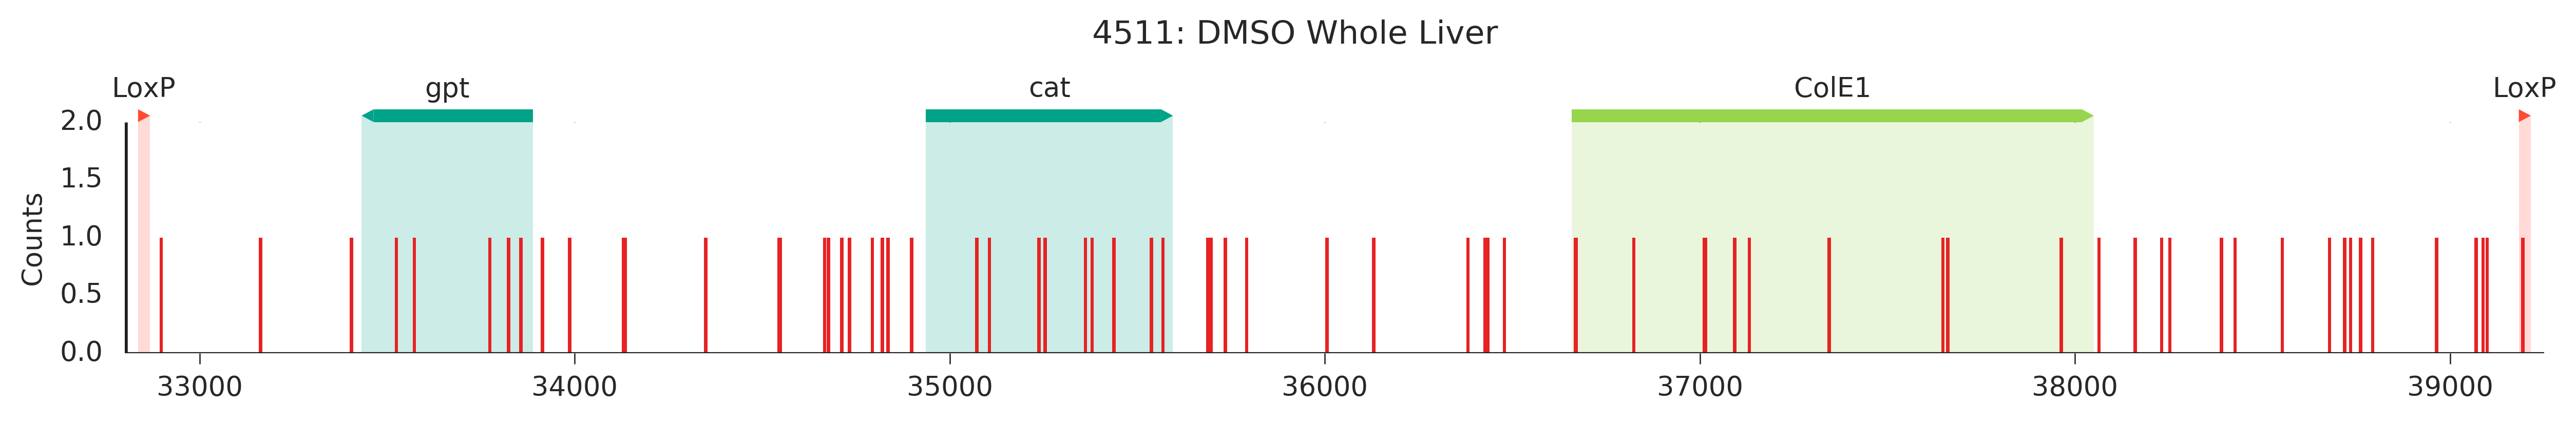

In [4]:
from siglib.mutpos import from_mutpos
from siglib.figures import variant_positions_plot

results = {}

for treatment in sorted(data_m[72].keys()):
    results[treatment] = {}
    for id, infile in sorted(data_m[72][treatment].items()):
        print('Sample: {}'.format(id))
        mutations = from_mutpos(infile, EG10fasta_file, clonality=clonality,
                                notation=notation, min_depth=min_depth, verbose=True)
        results[treatment][id] = mutations
        gff, ax = variant_positions_plot(positions=[m.position for m in sorted(set(mutations))],
                                         heights=[1 for m in sorted(set(mutations))],
                                         gff_file=EG10gff_file,
                                         title='{}: {}'.format(id, treatment),
                                         varplot_kwds={'xlabel': '', 'ylabel': 'Counts'})

Visualize Spectrum of Mutations in 3-mer Contexts
---

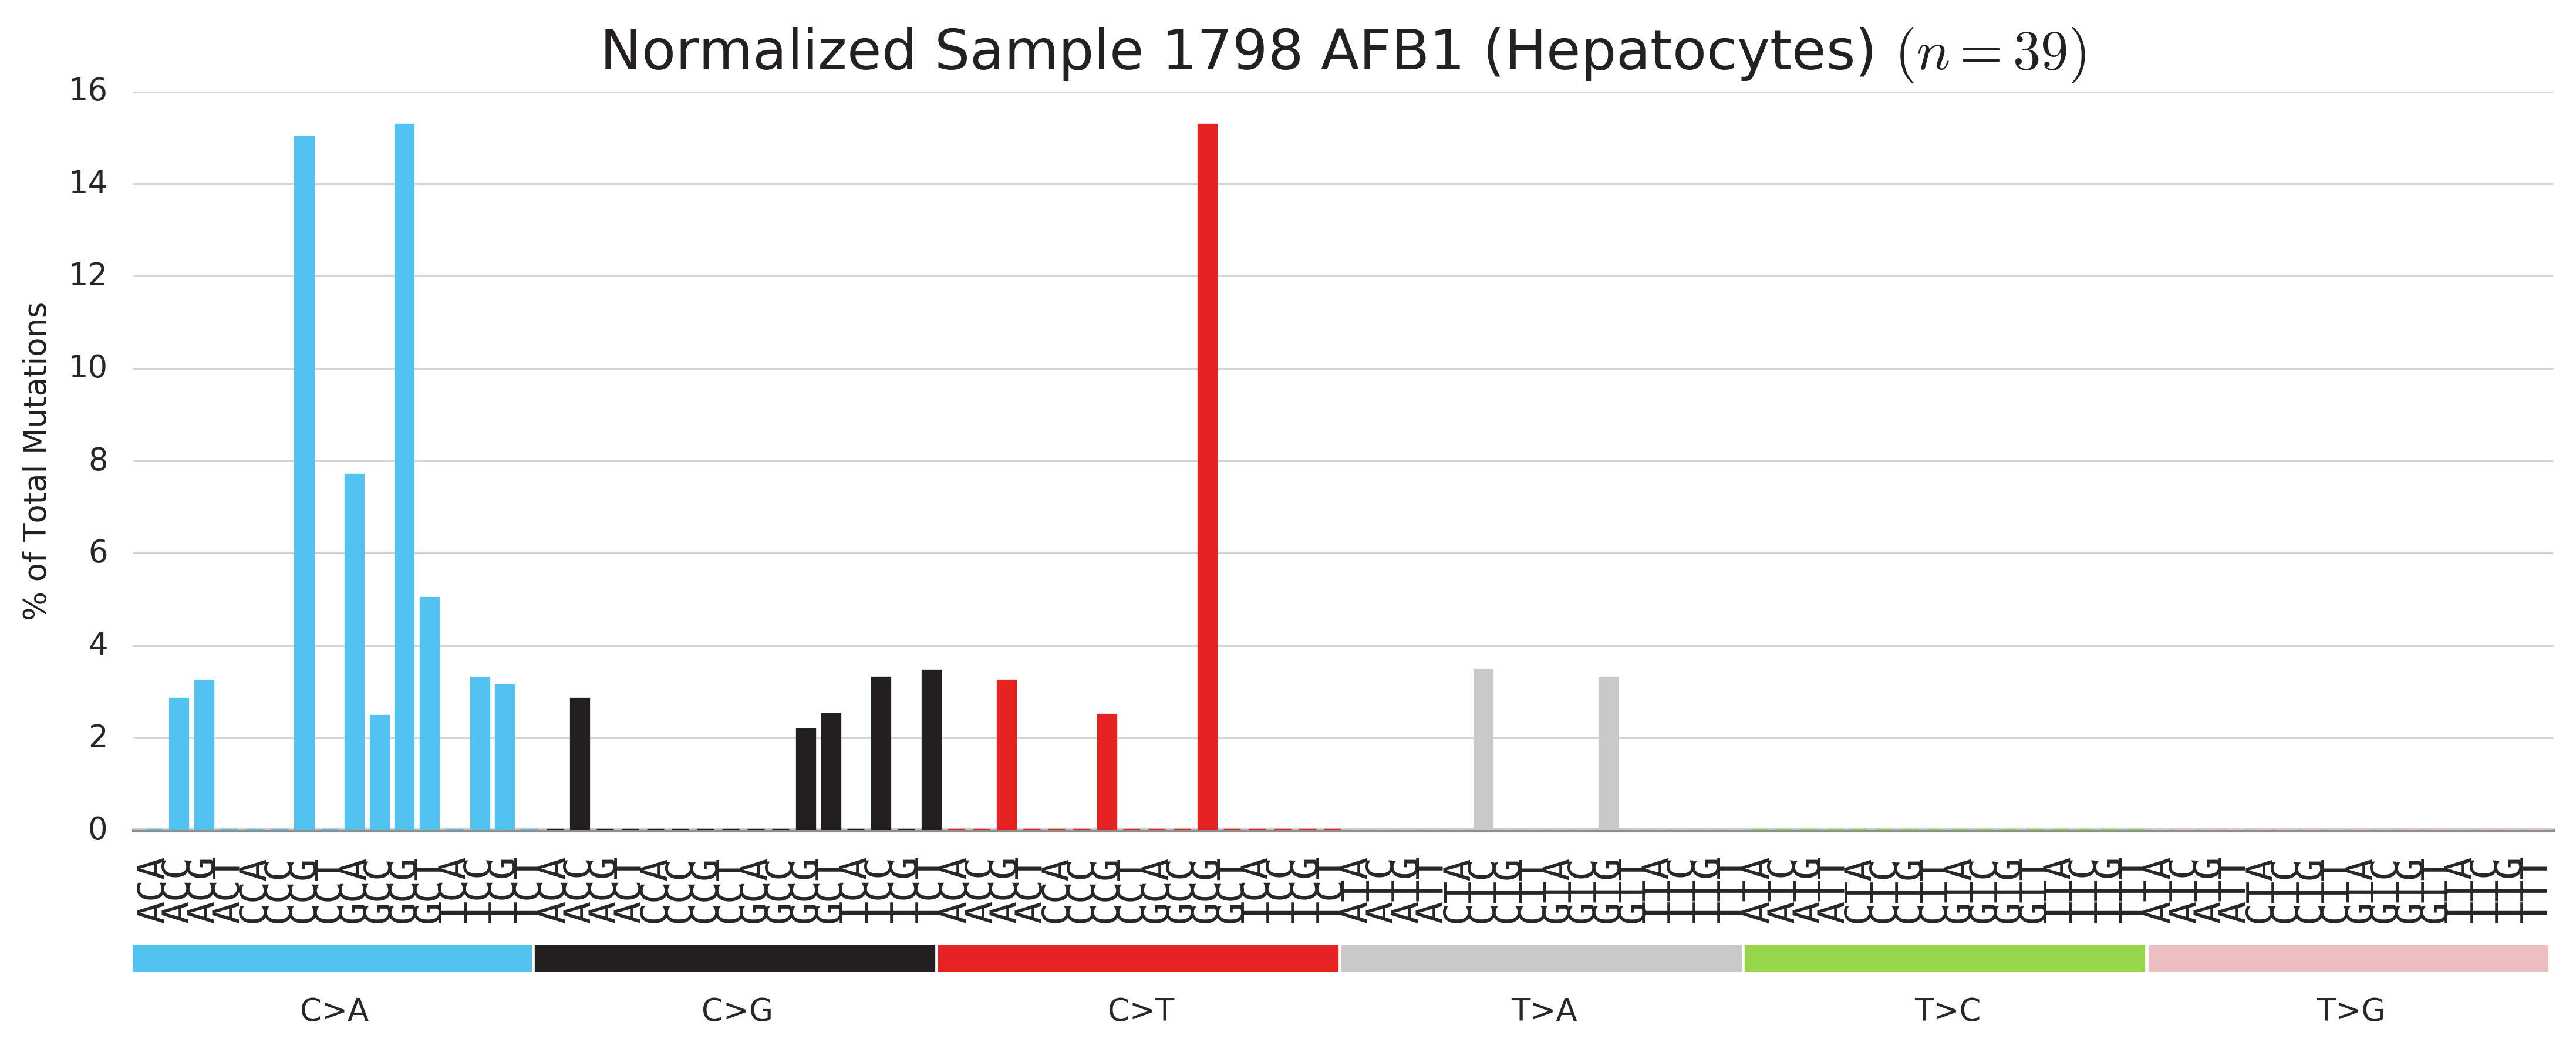

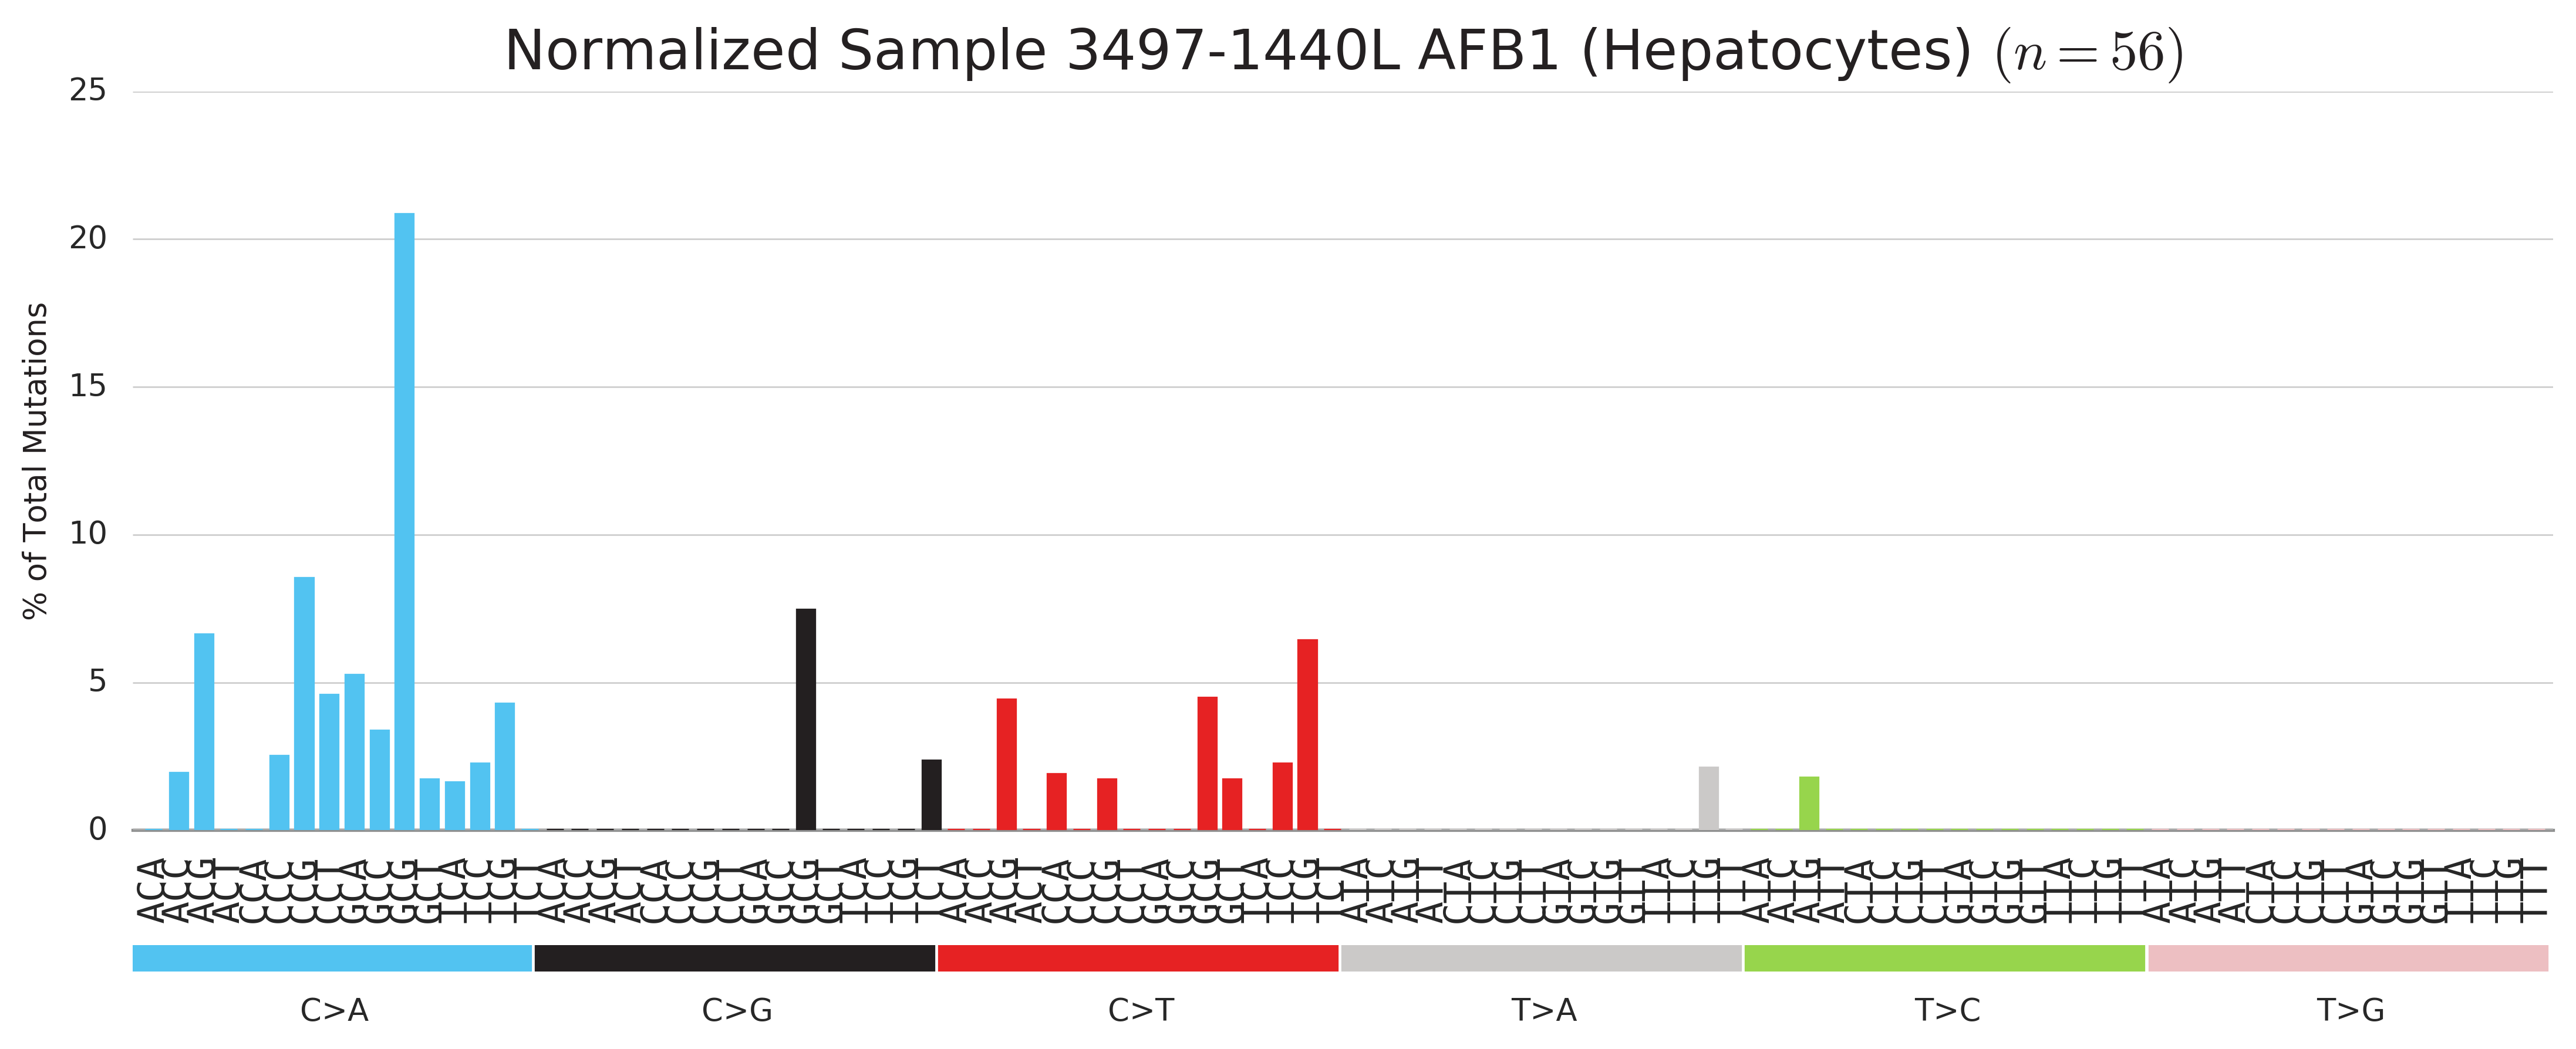

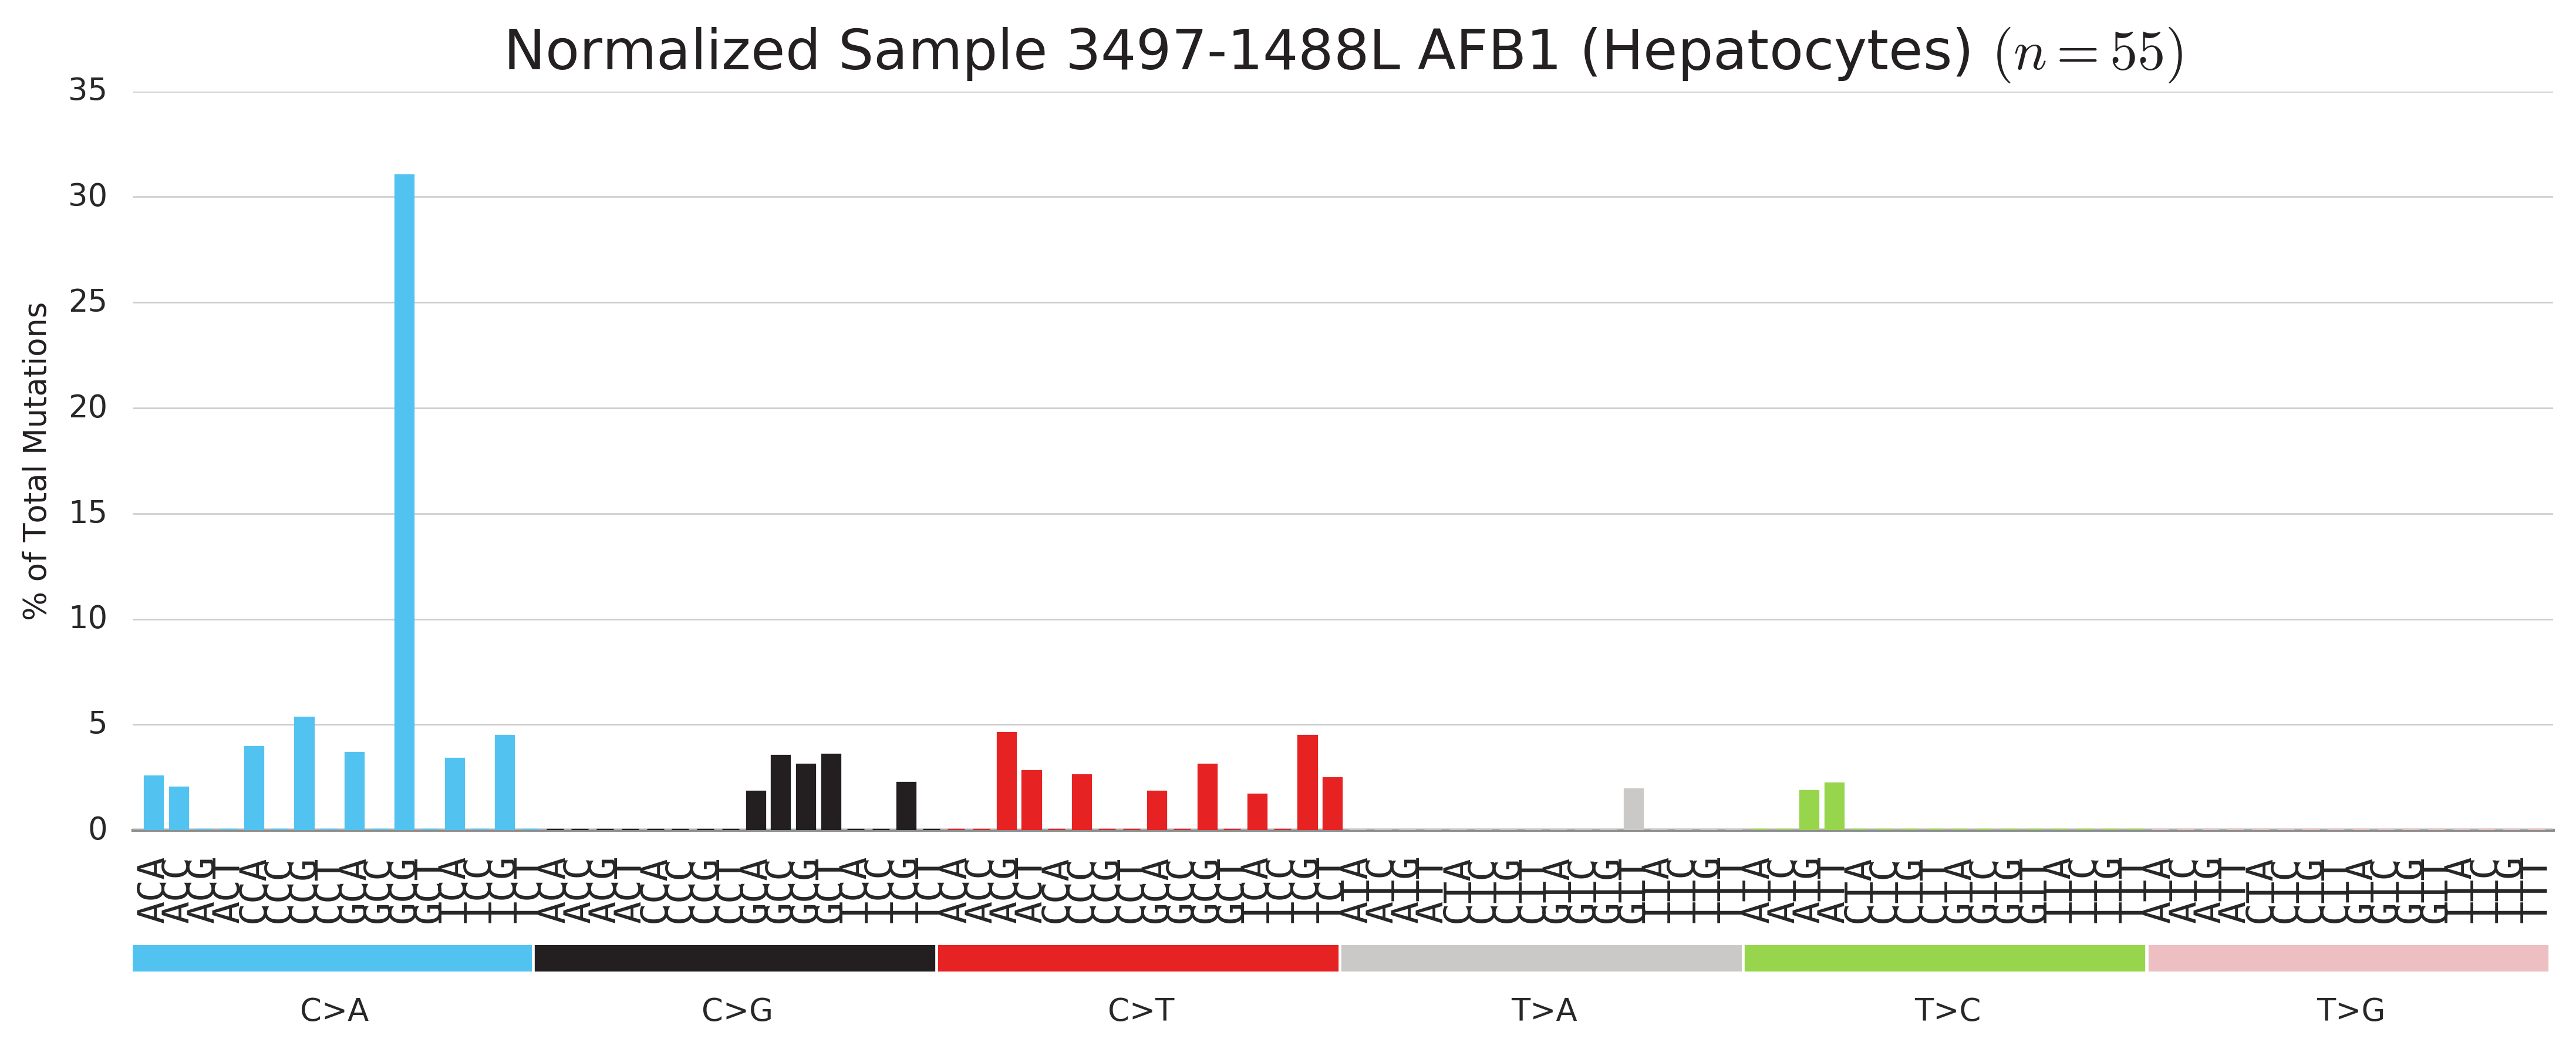

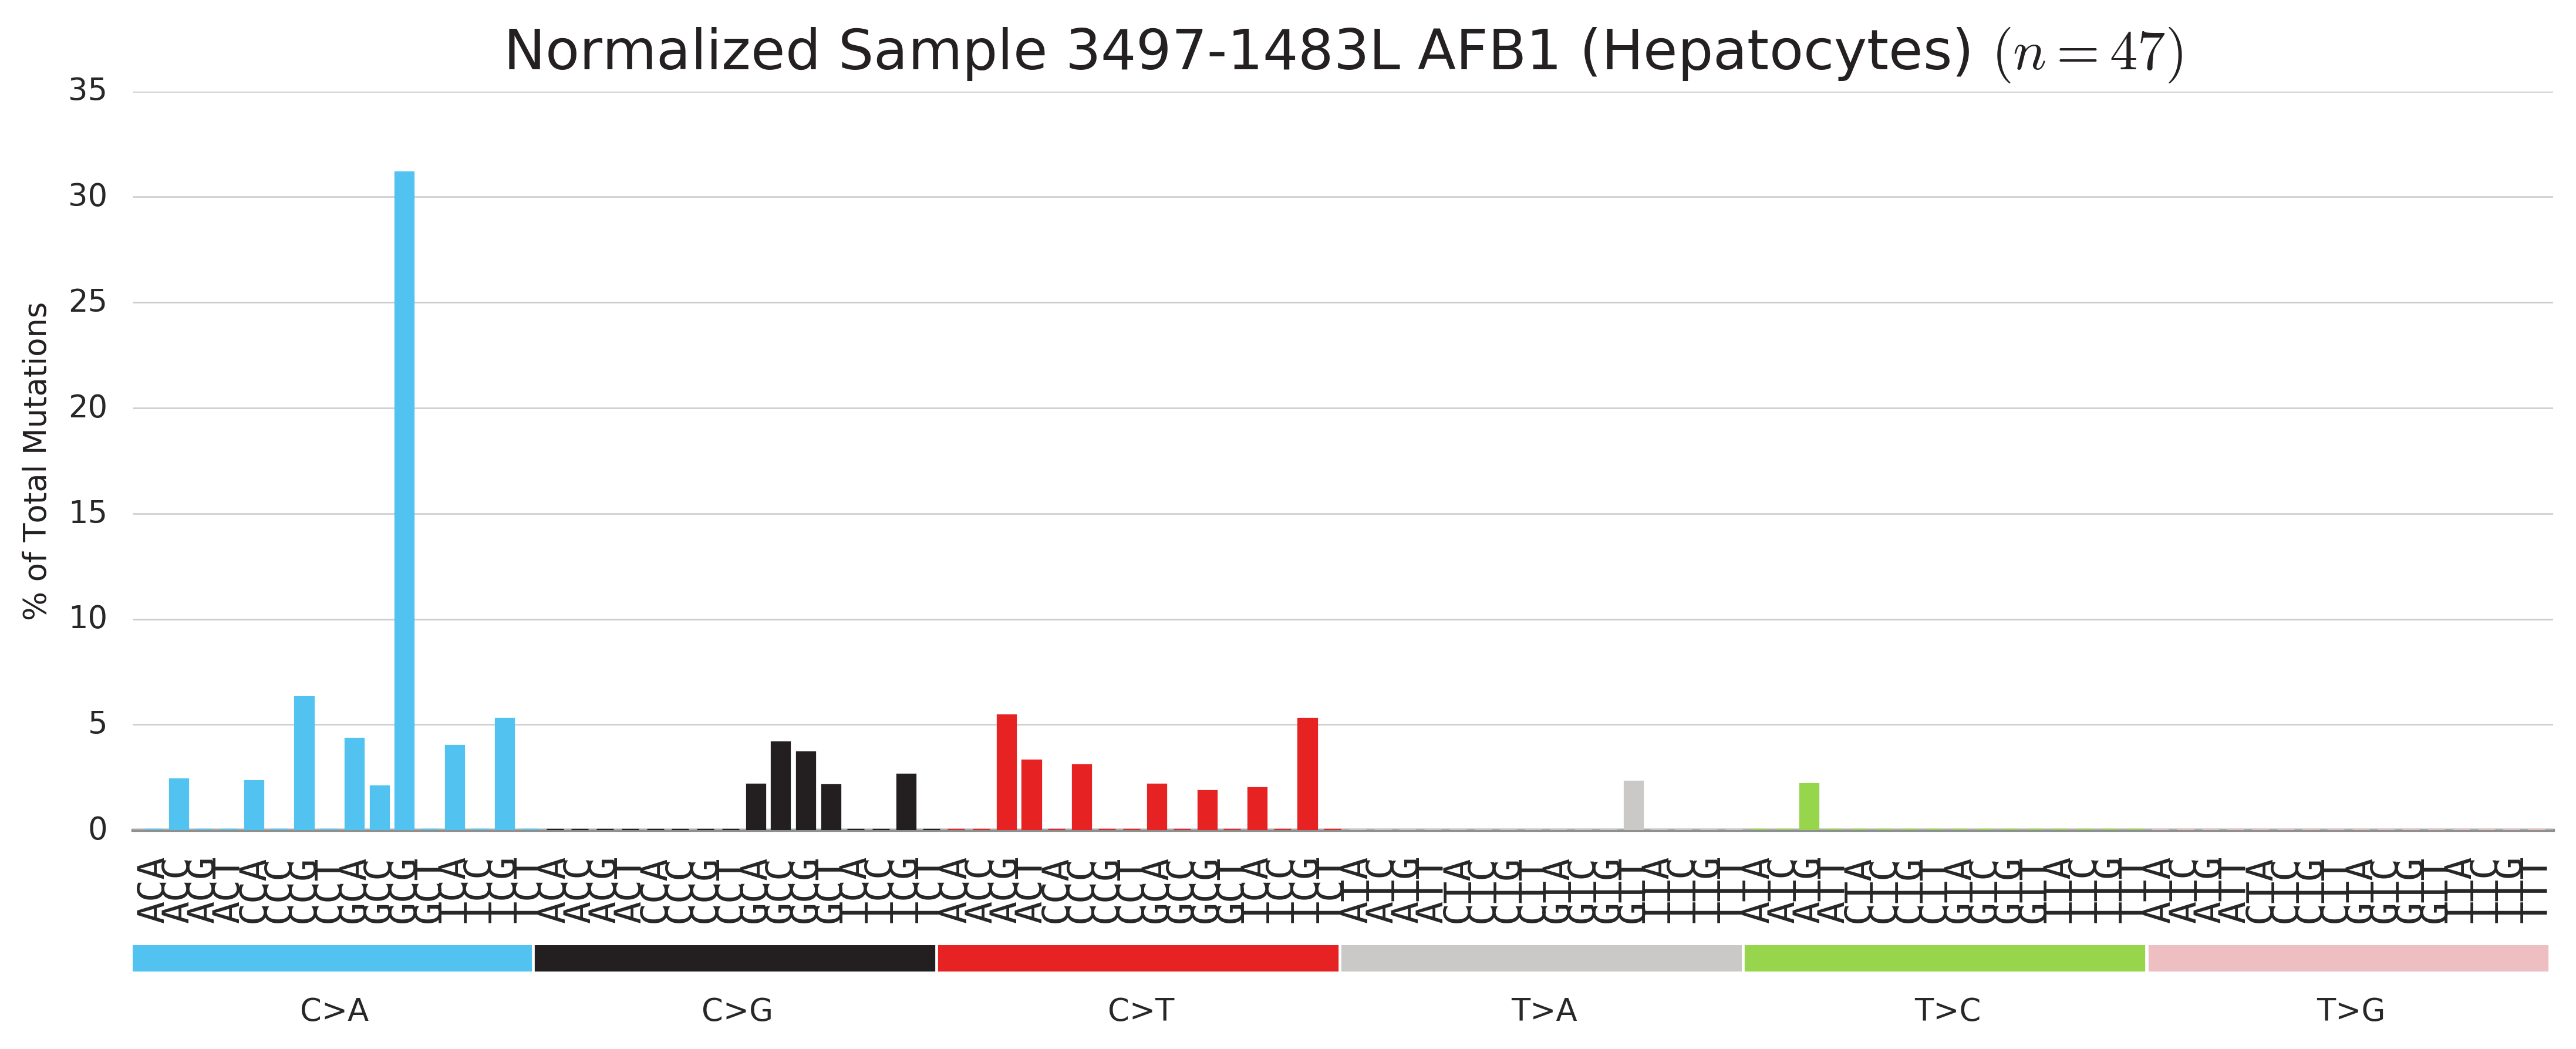

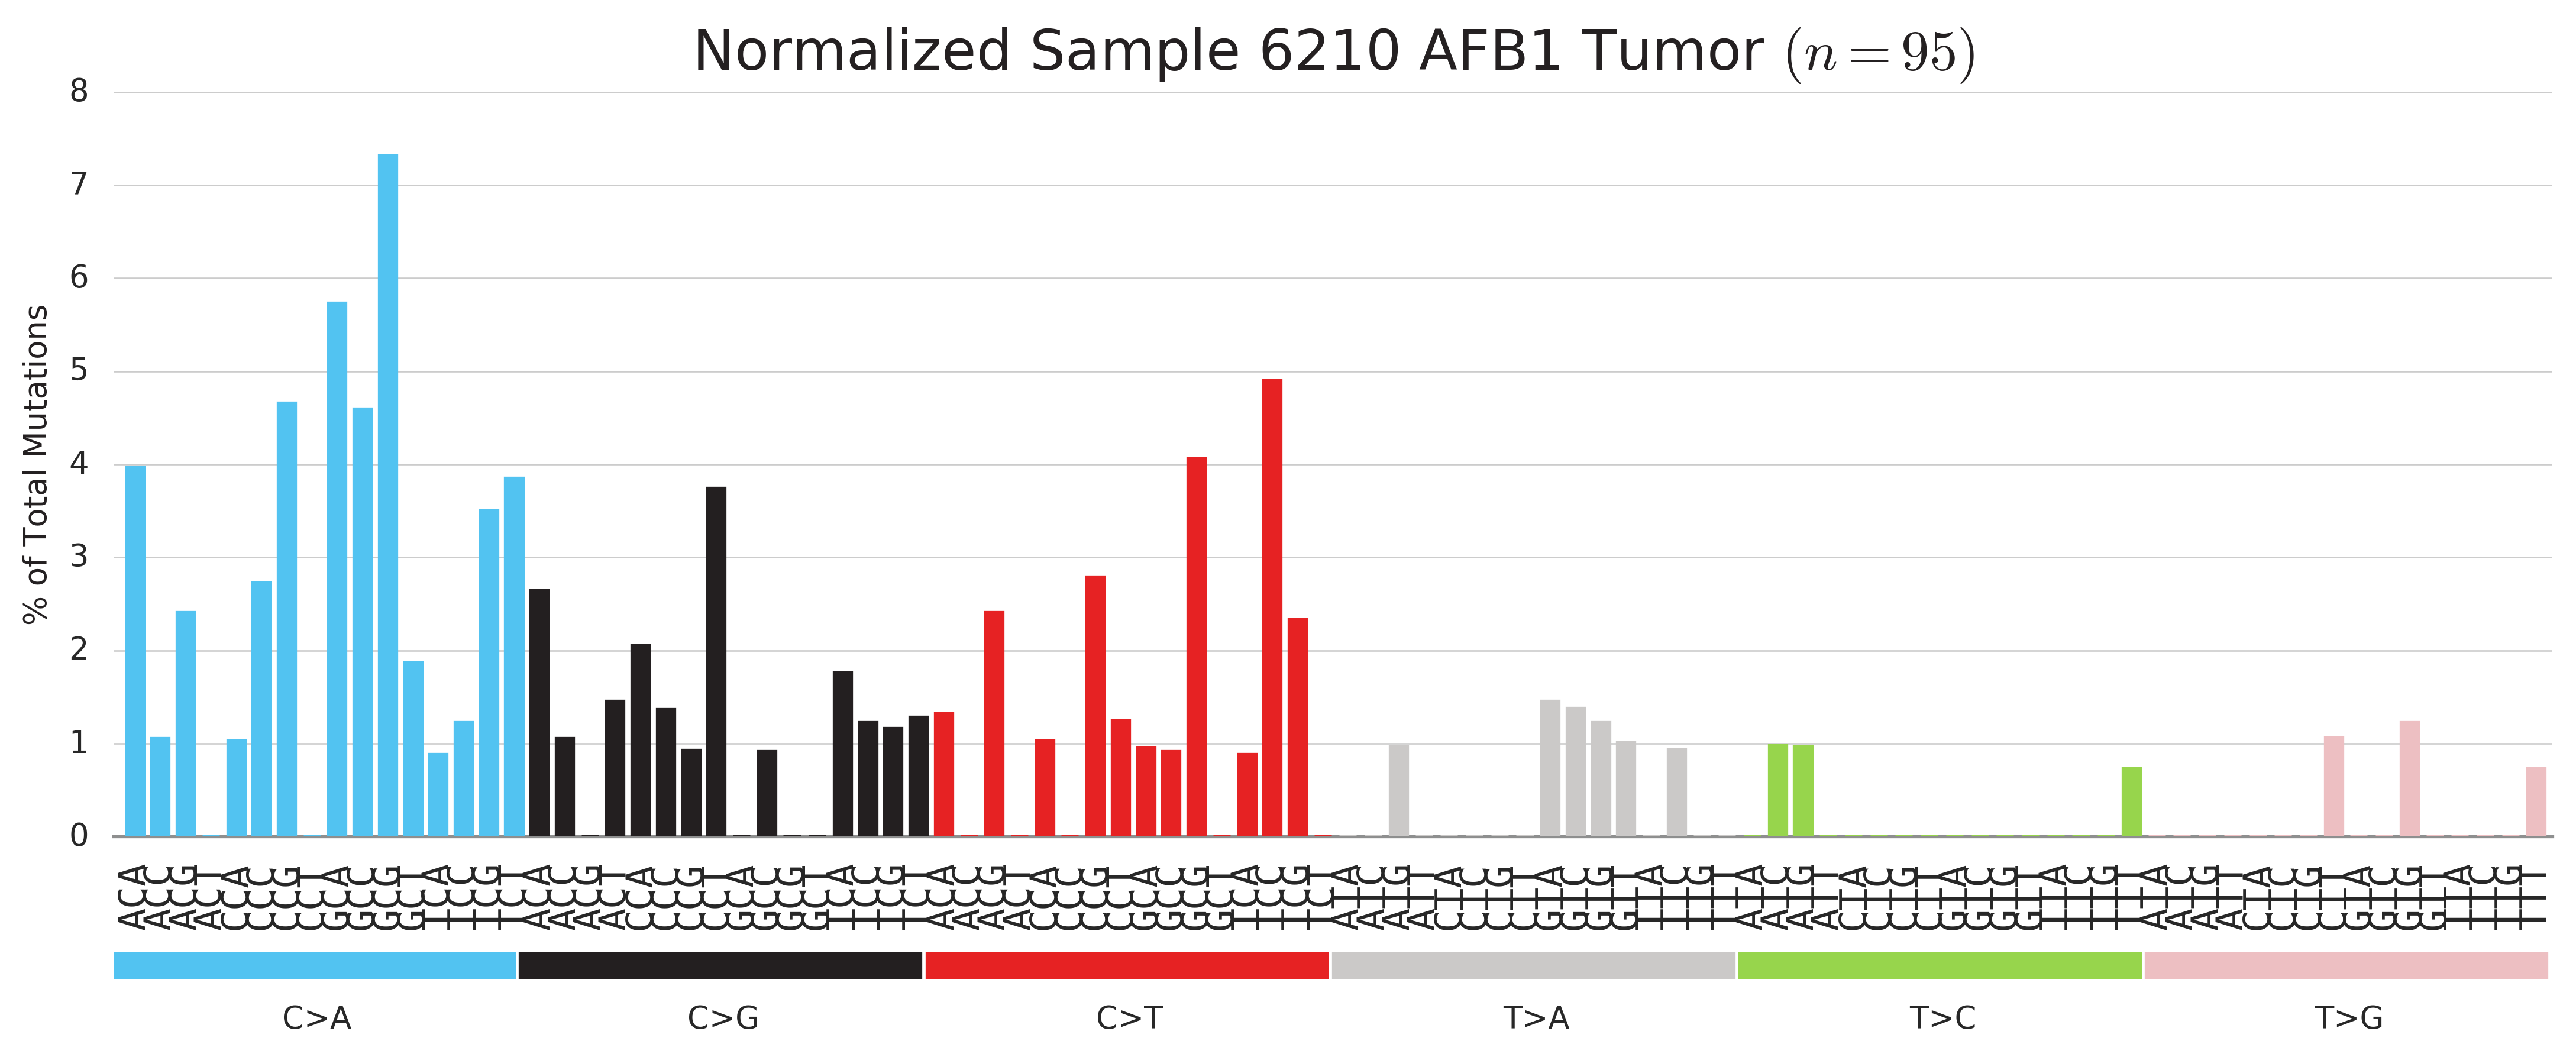

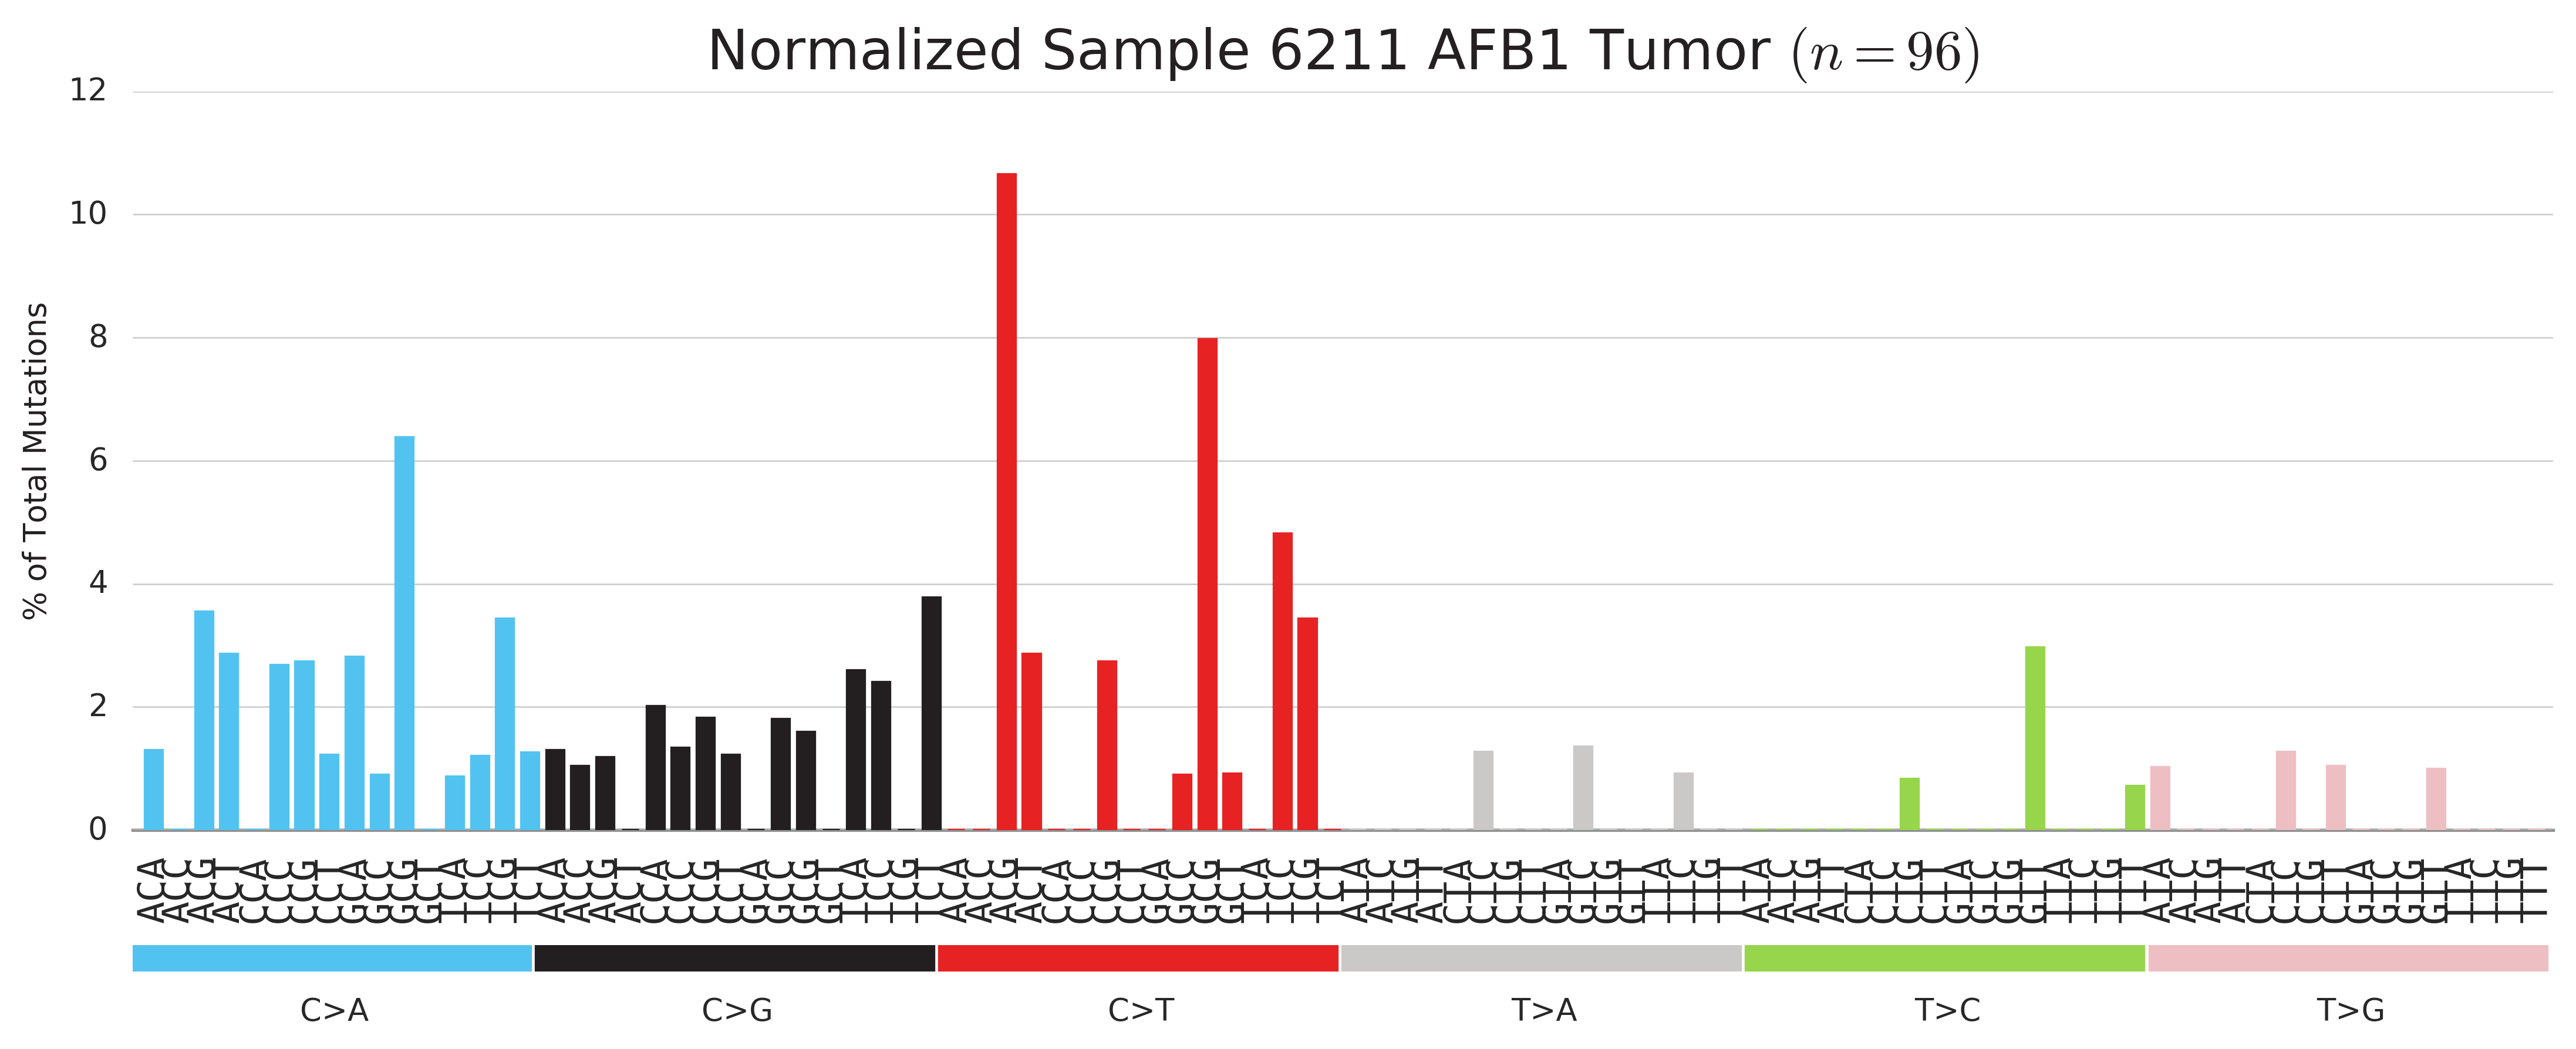

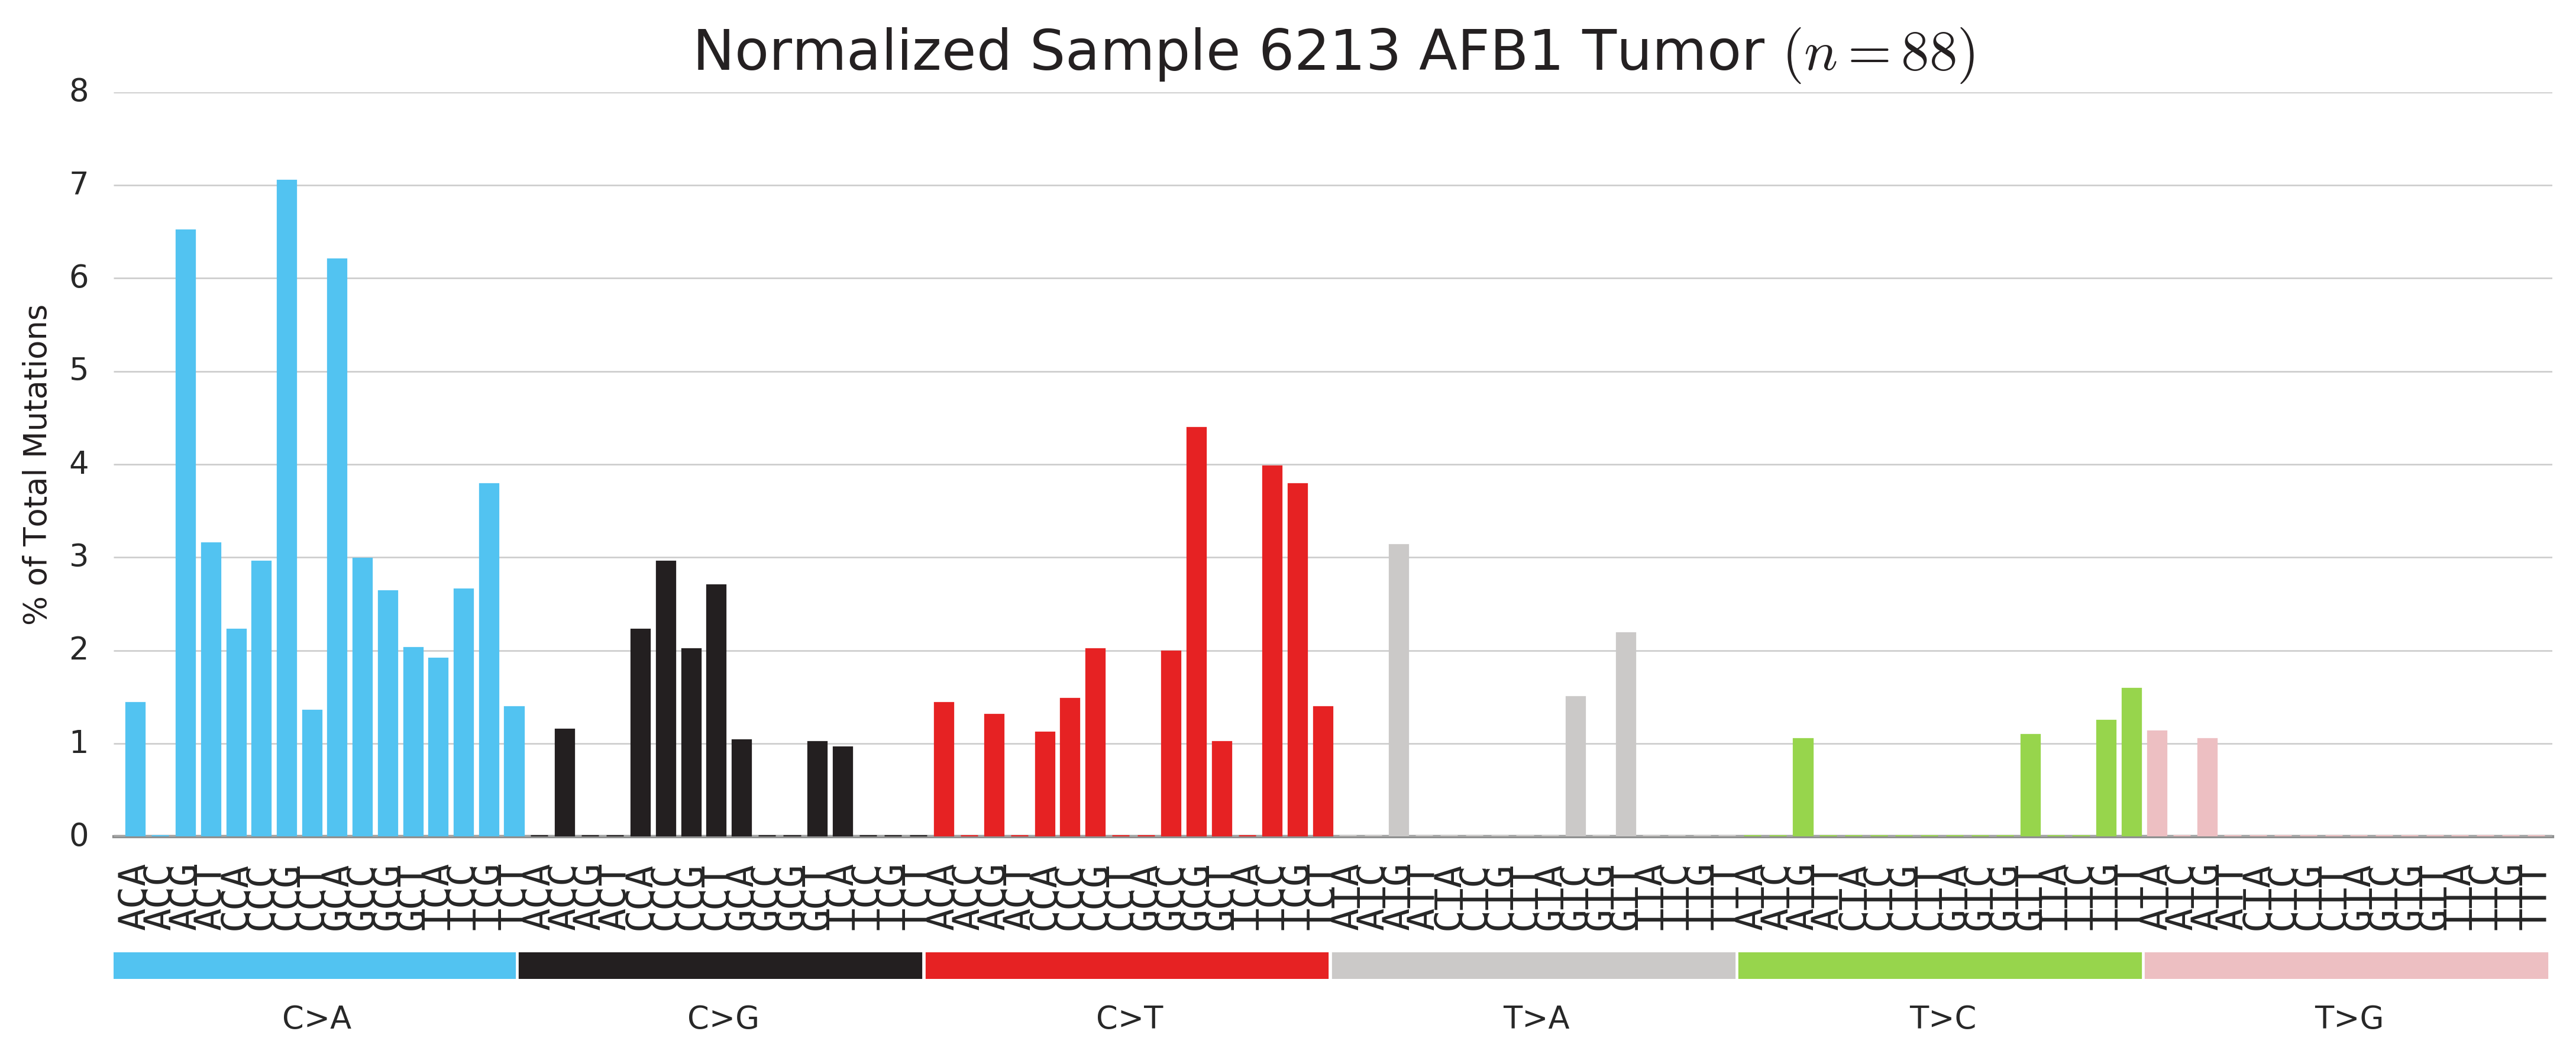

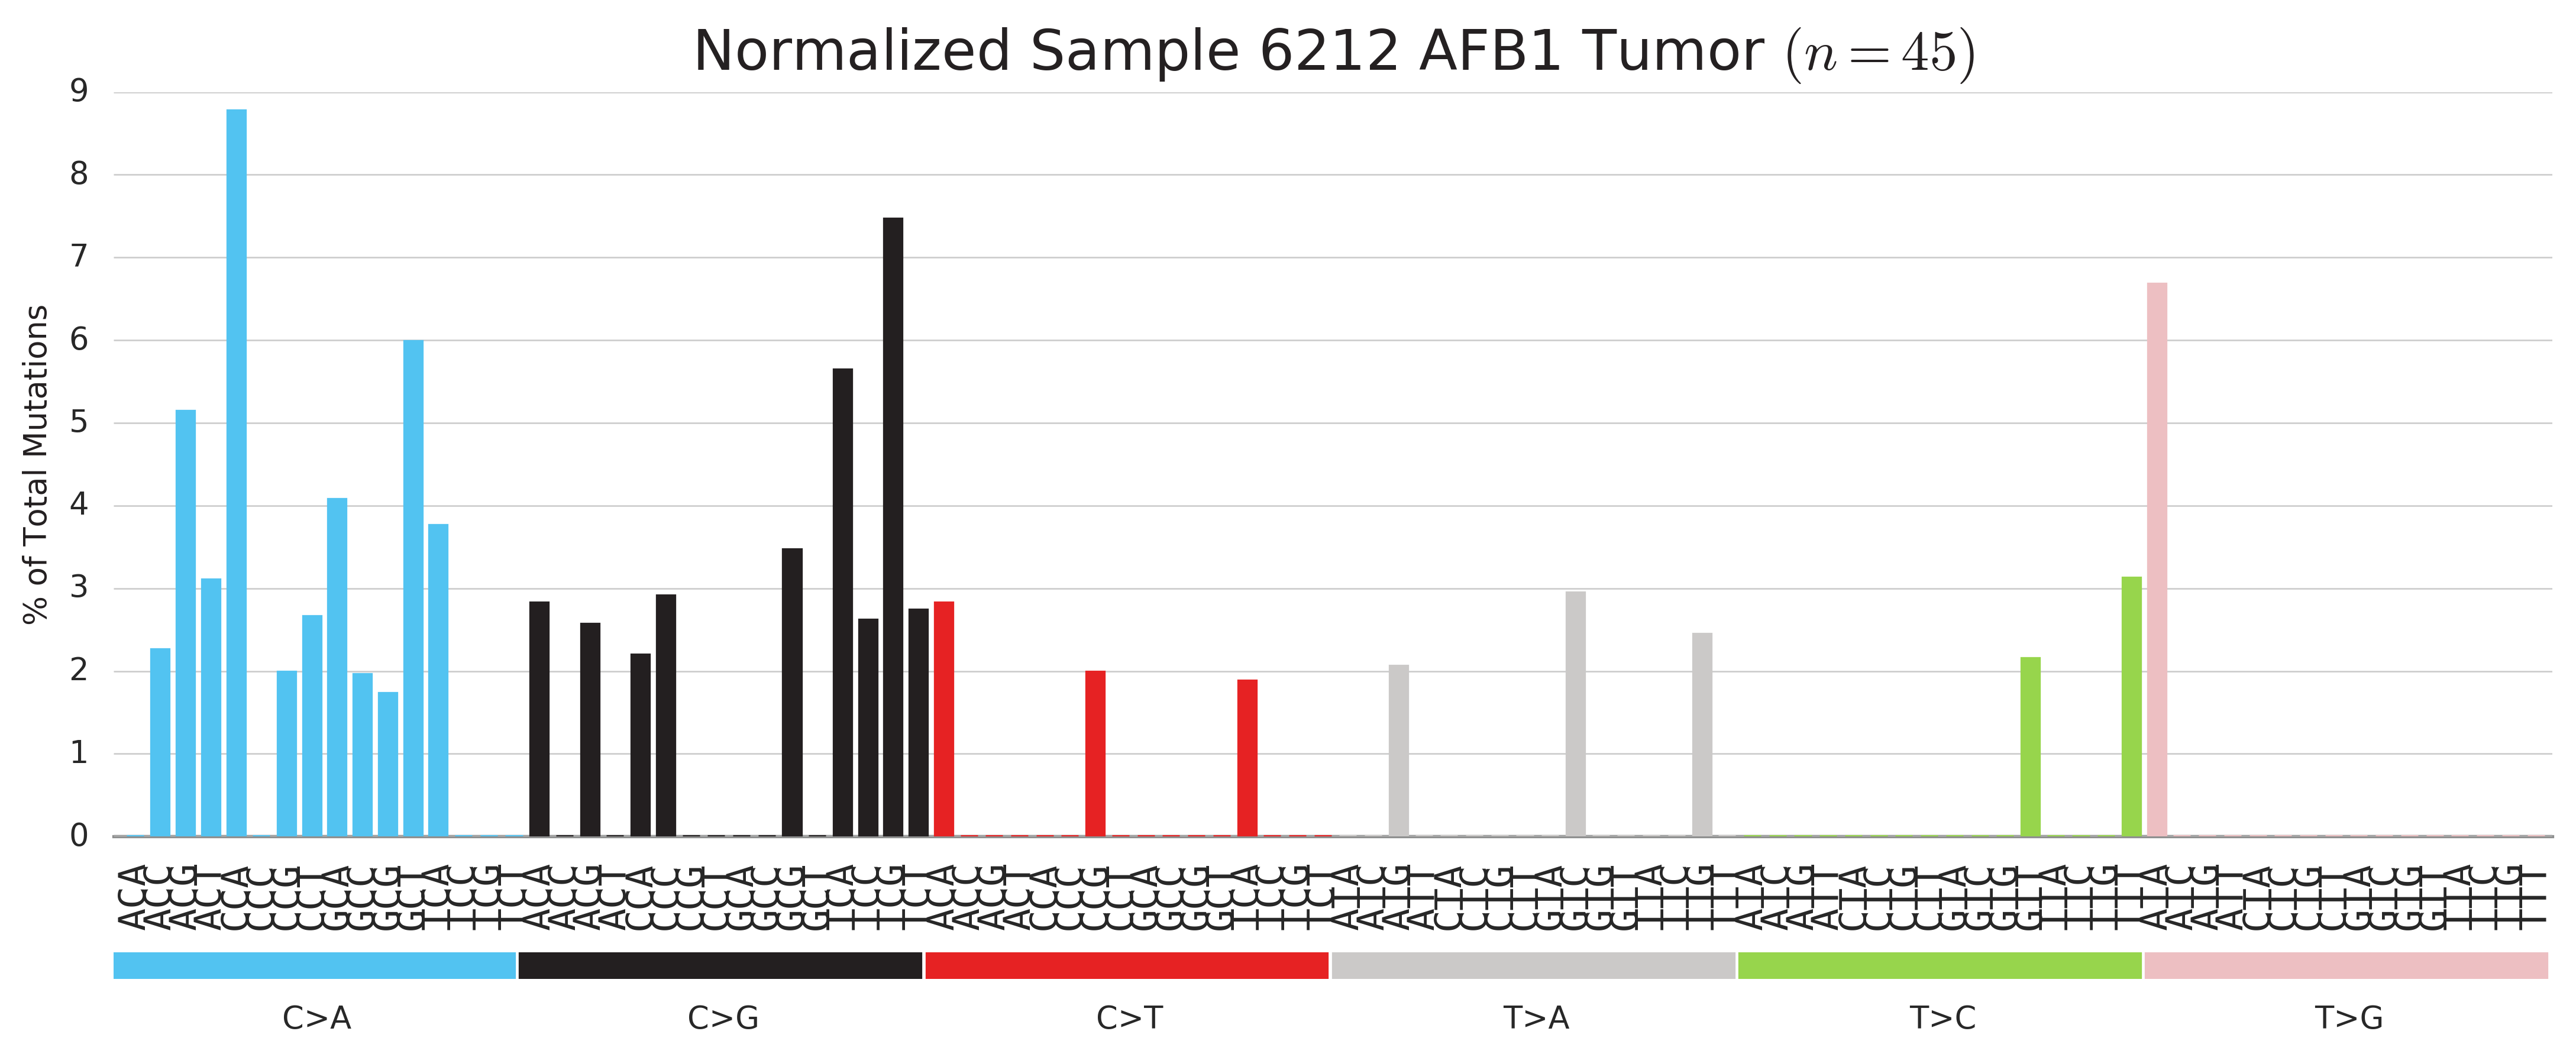

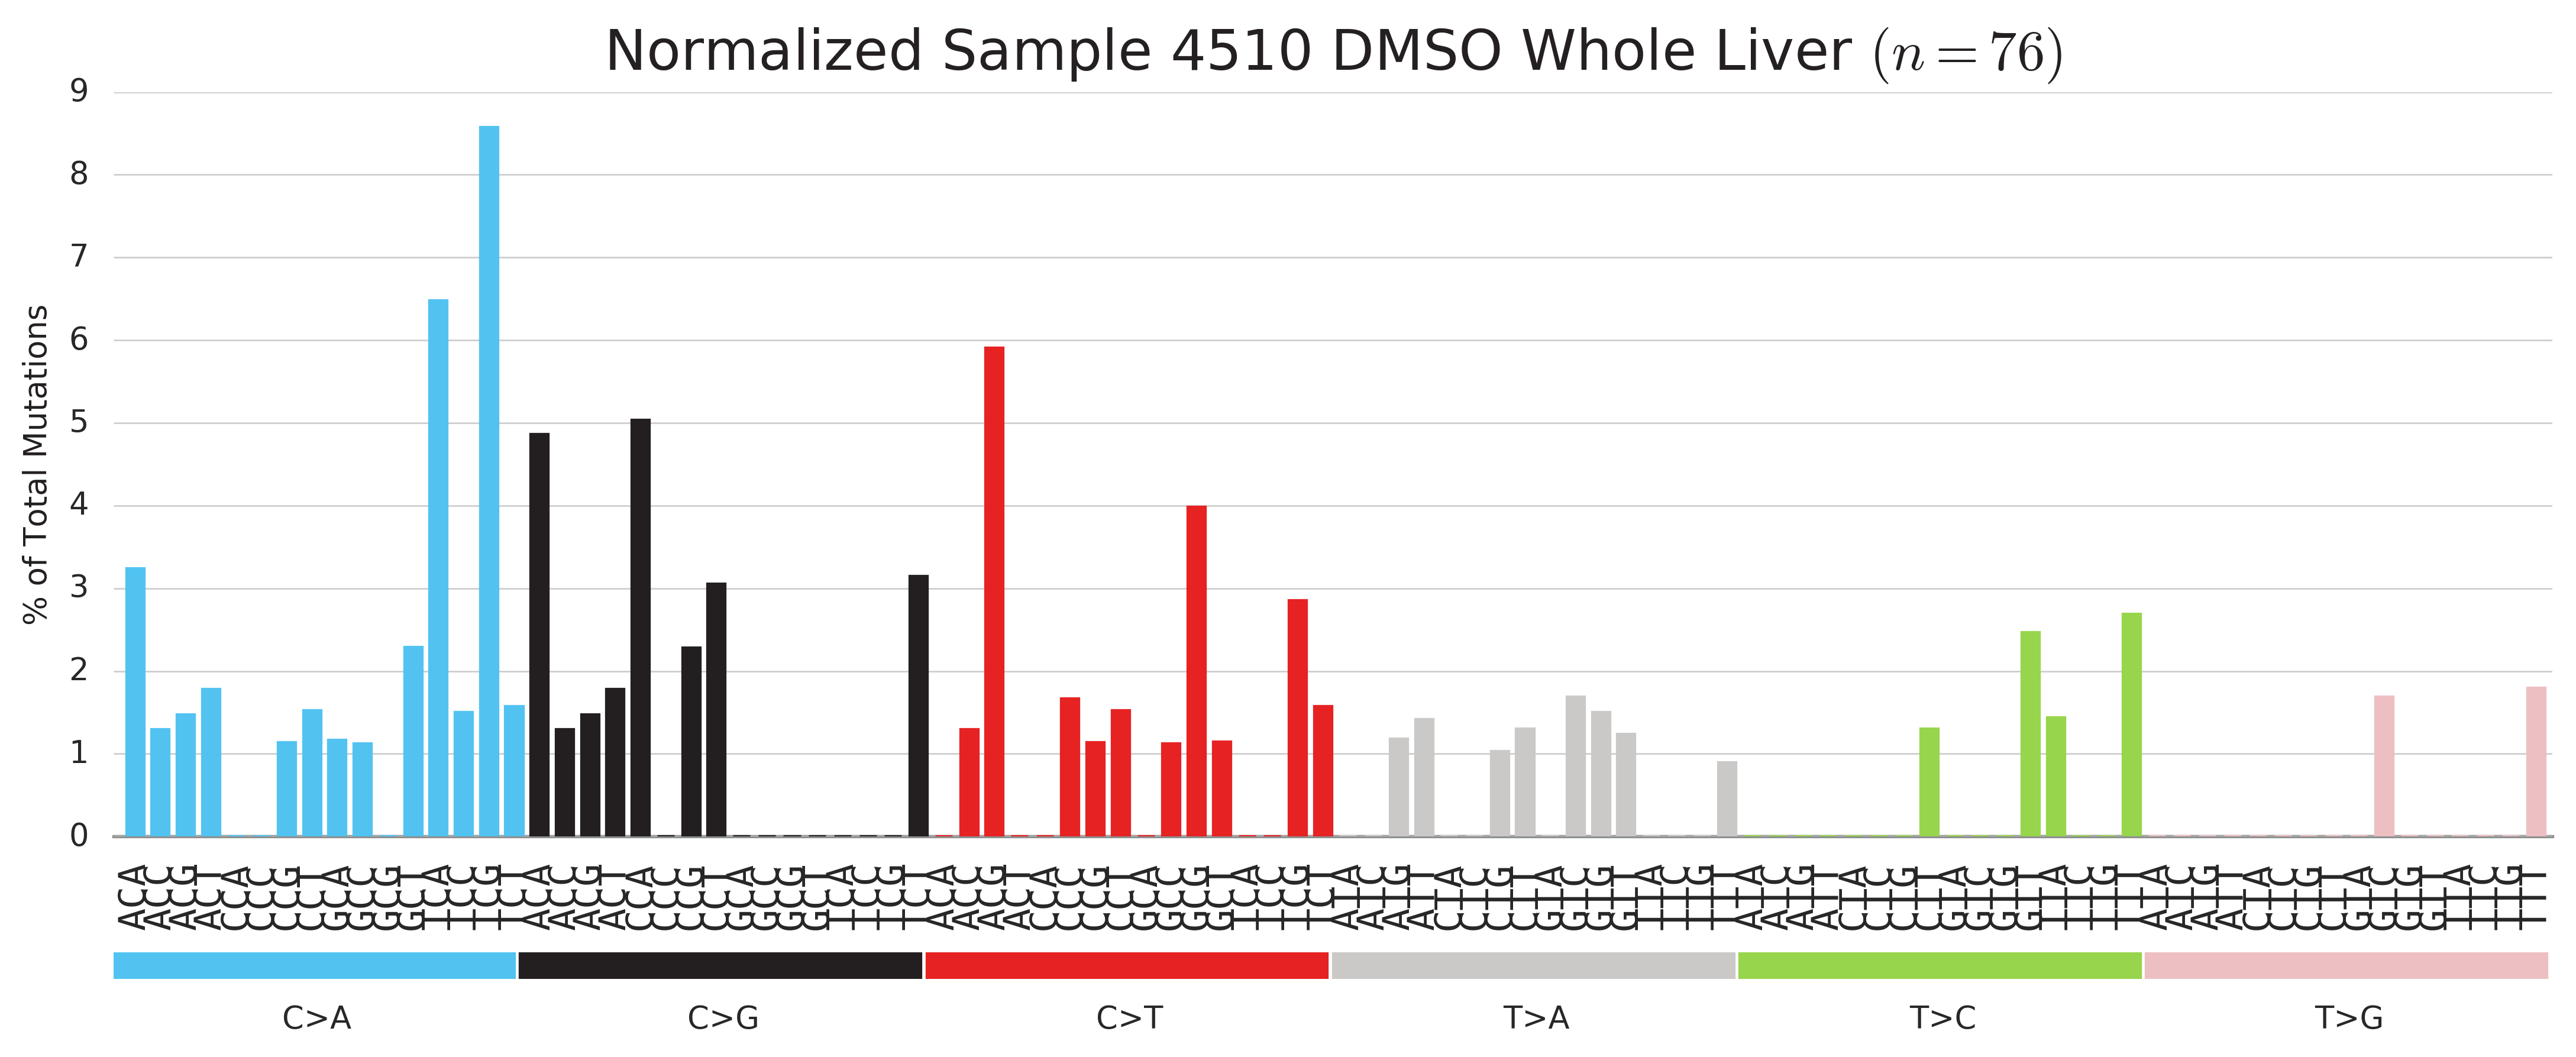

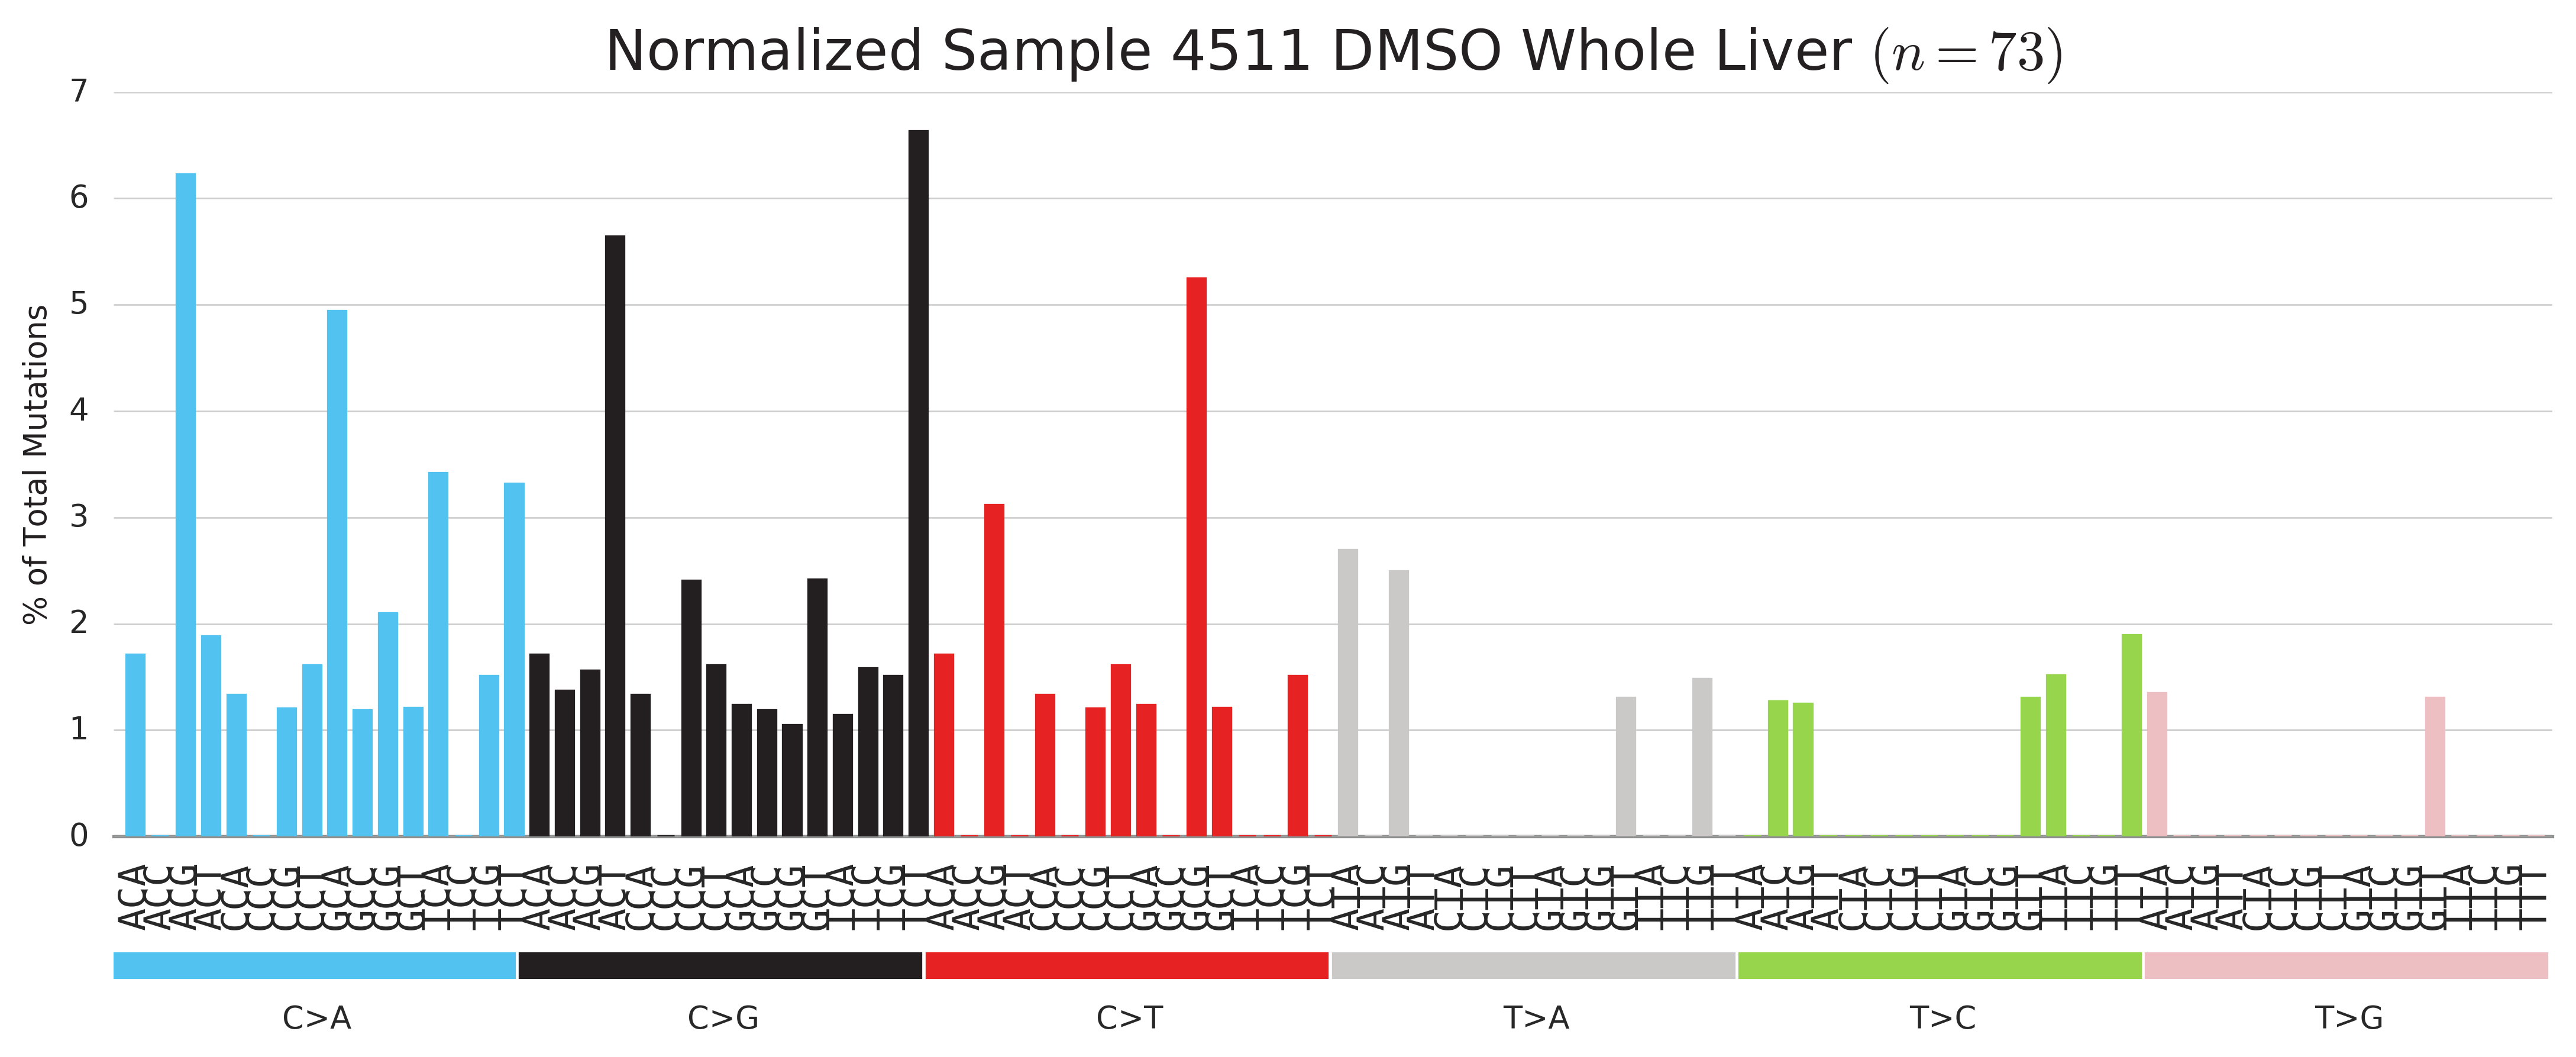

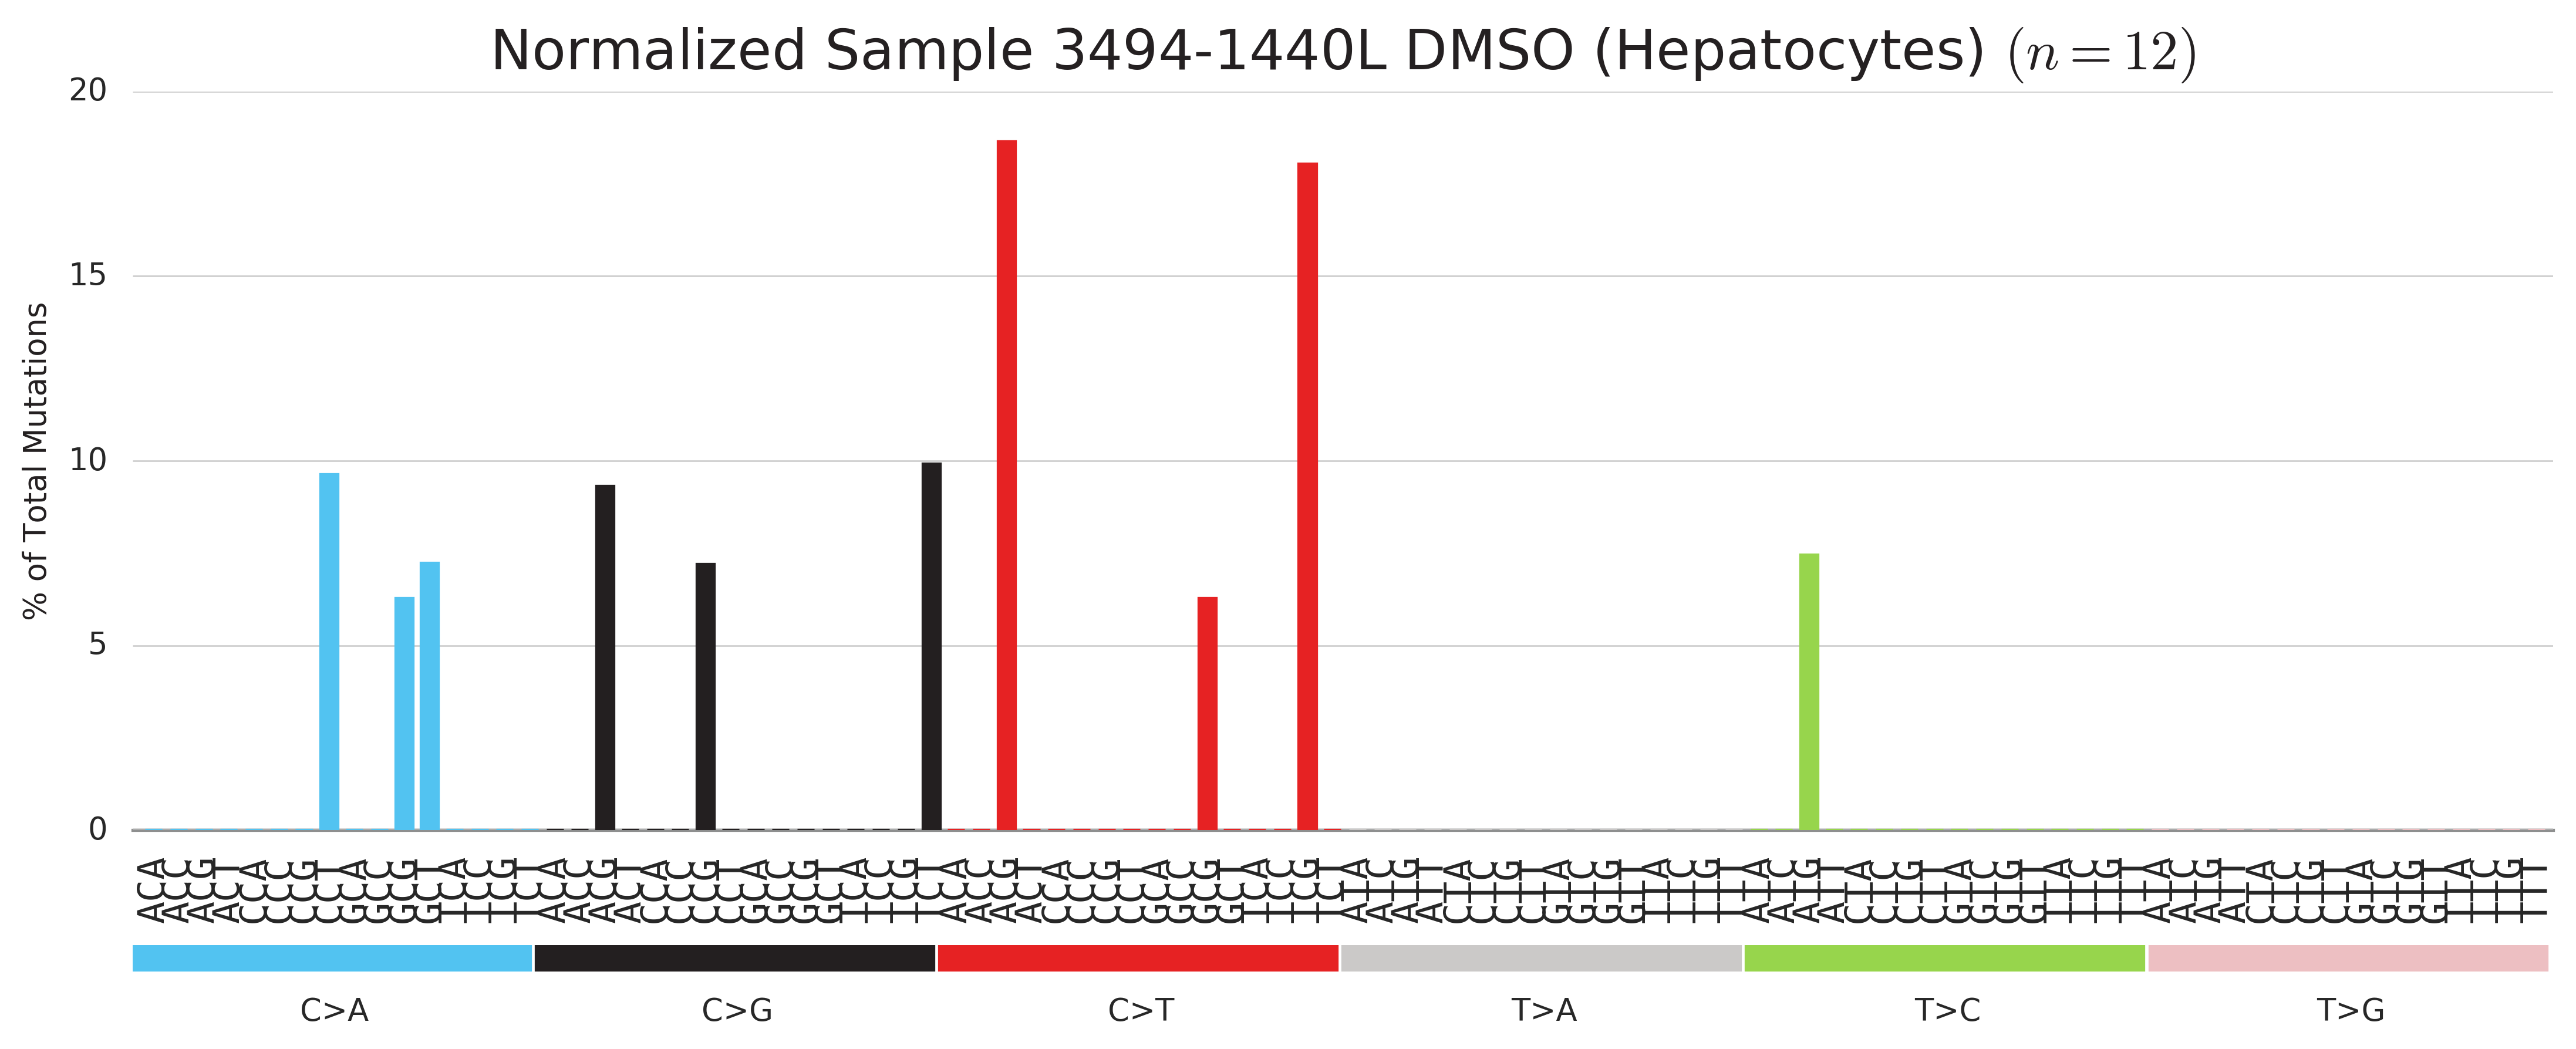

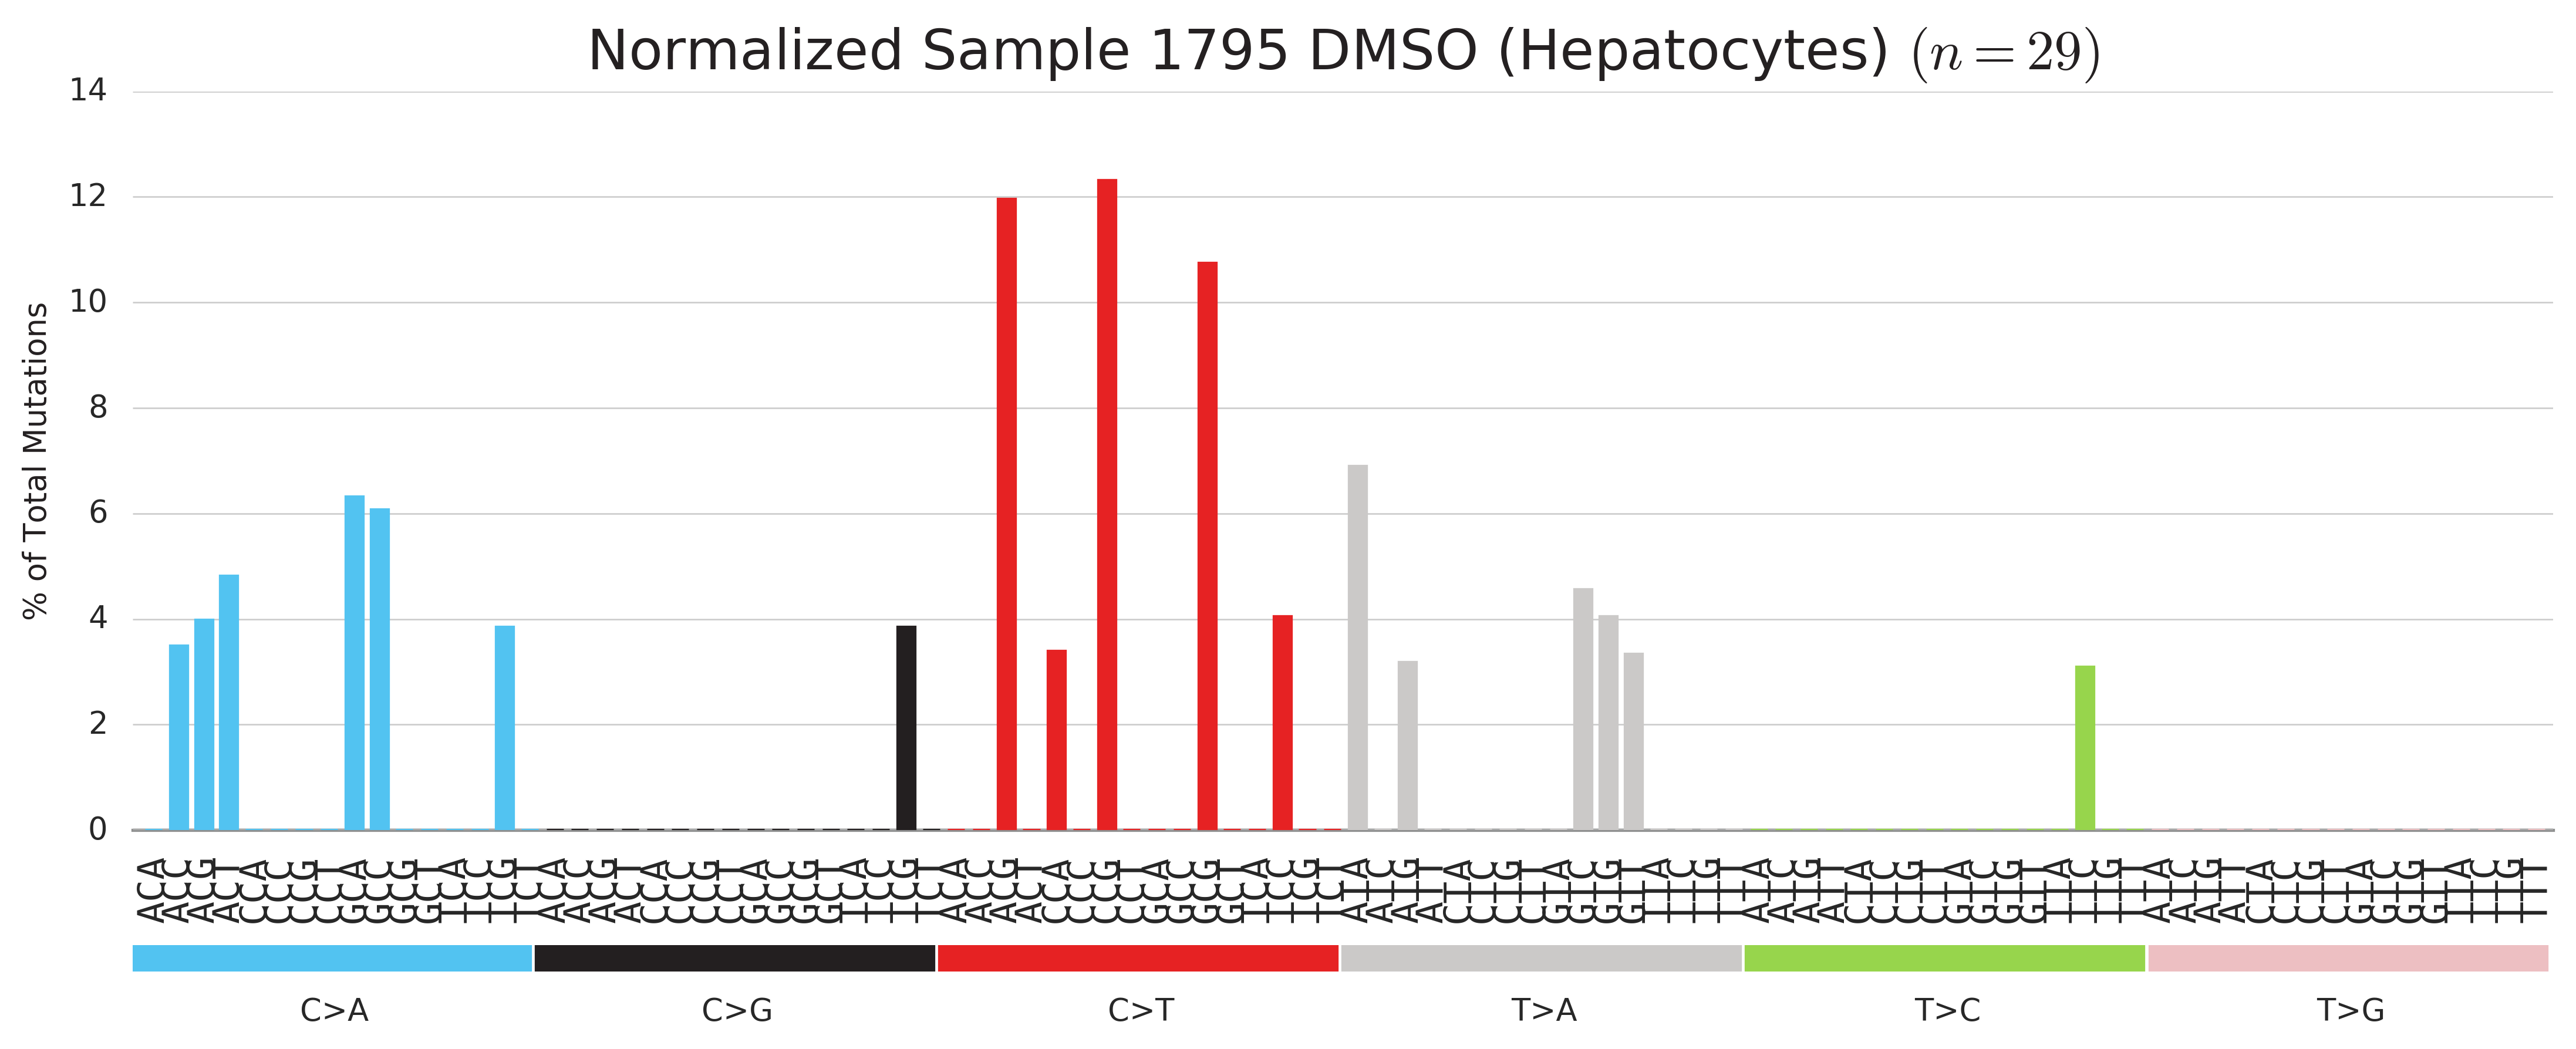

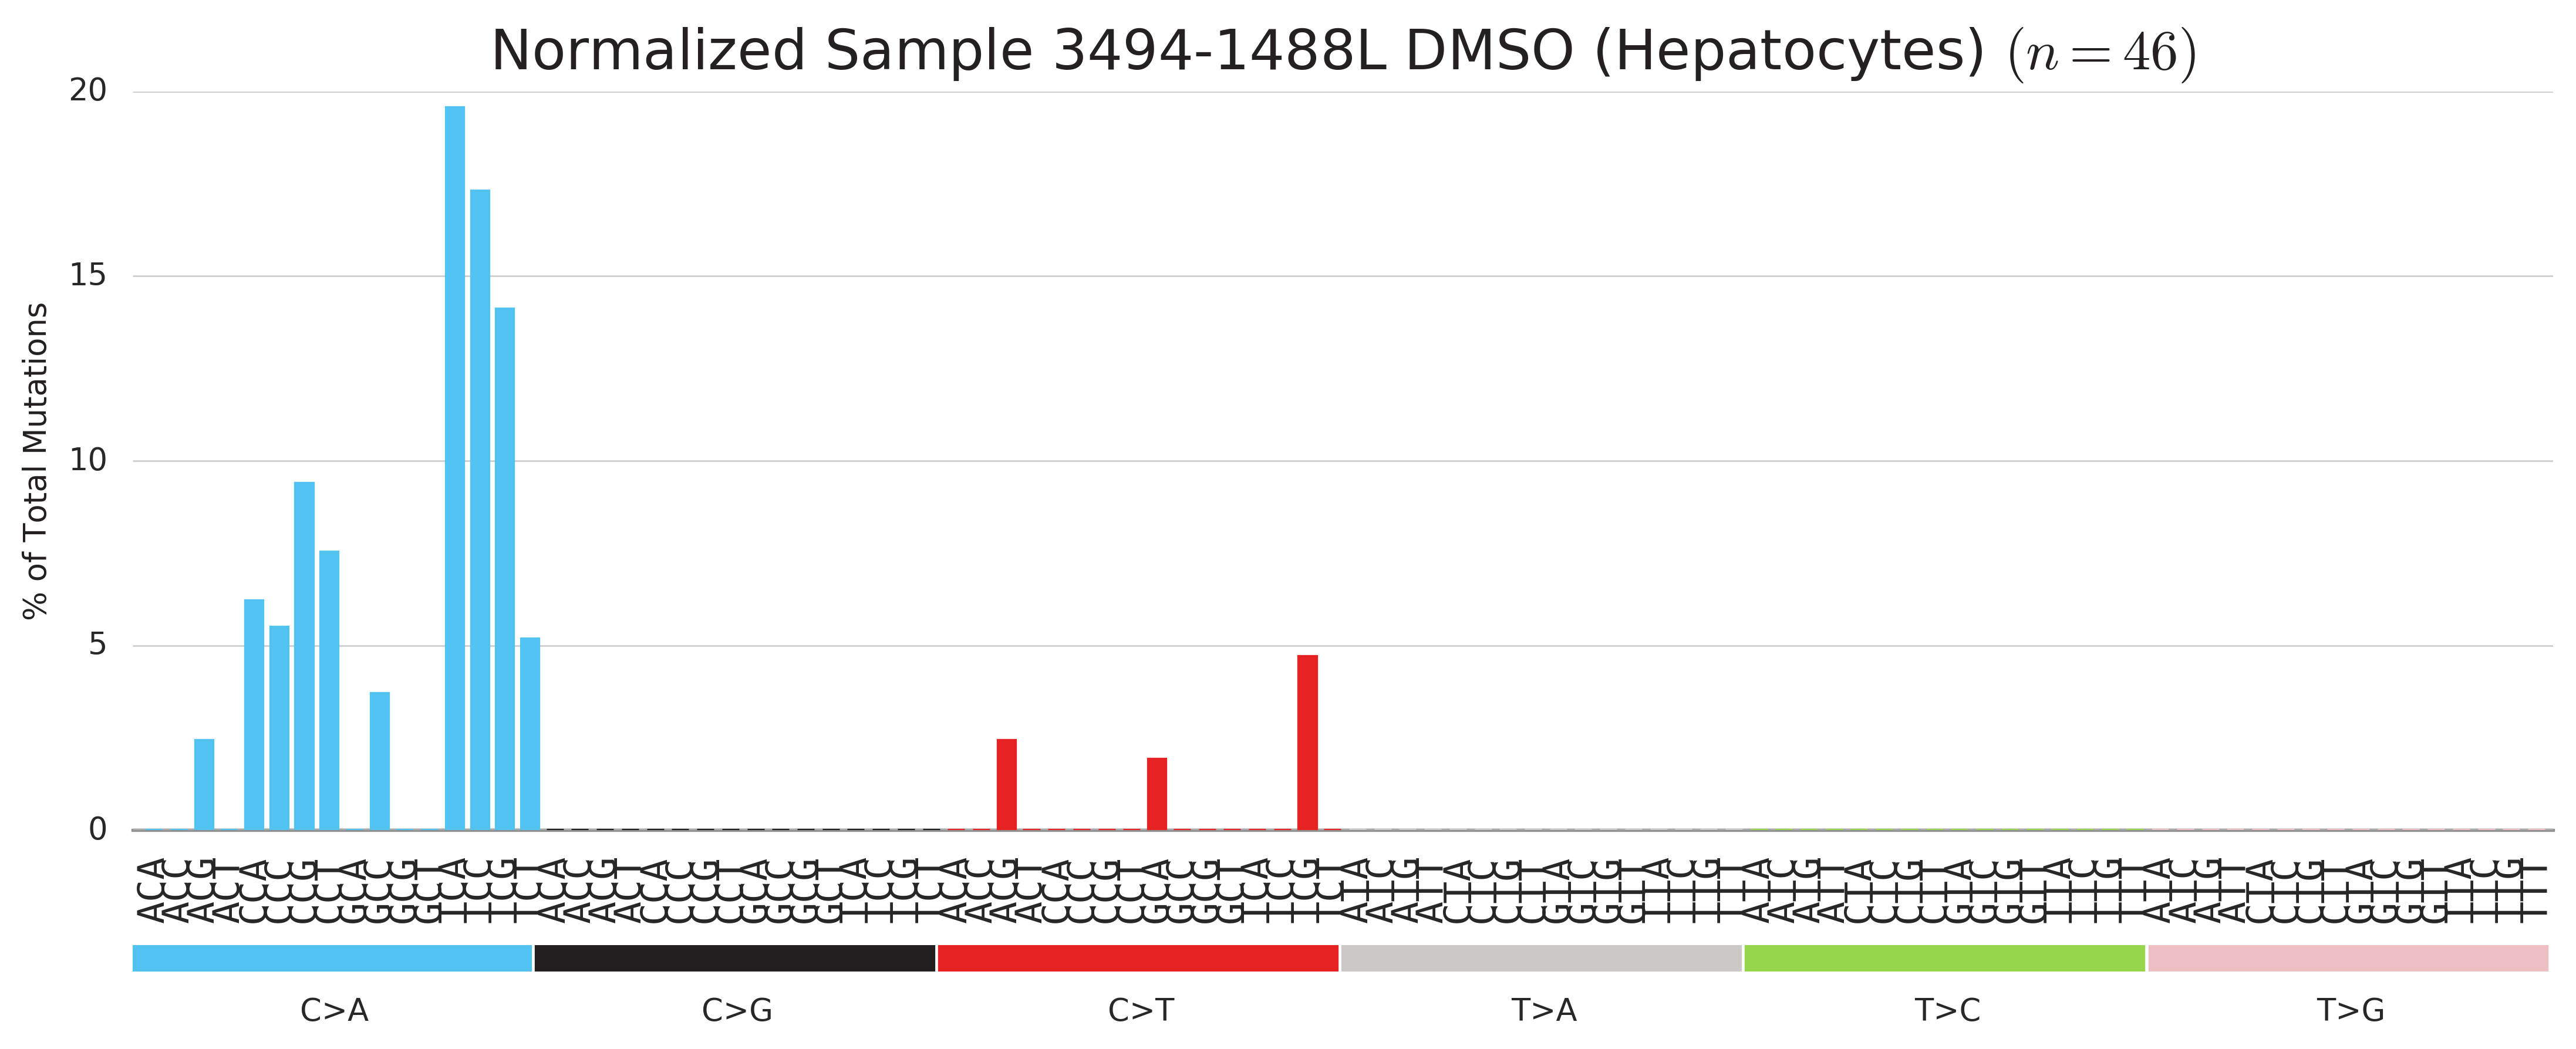

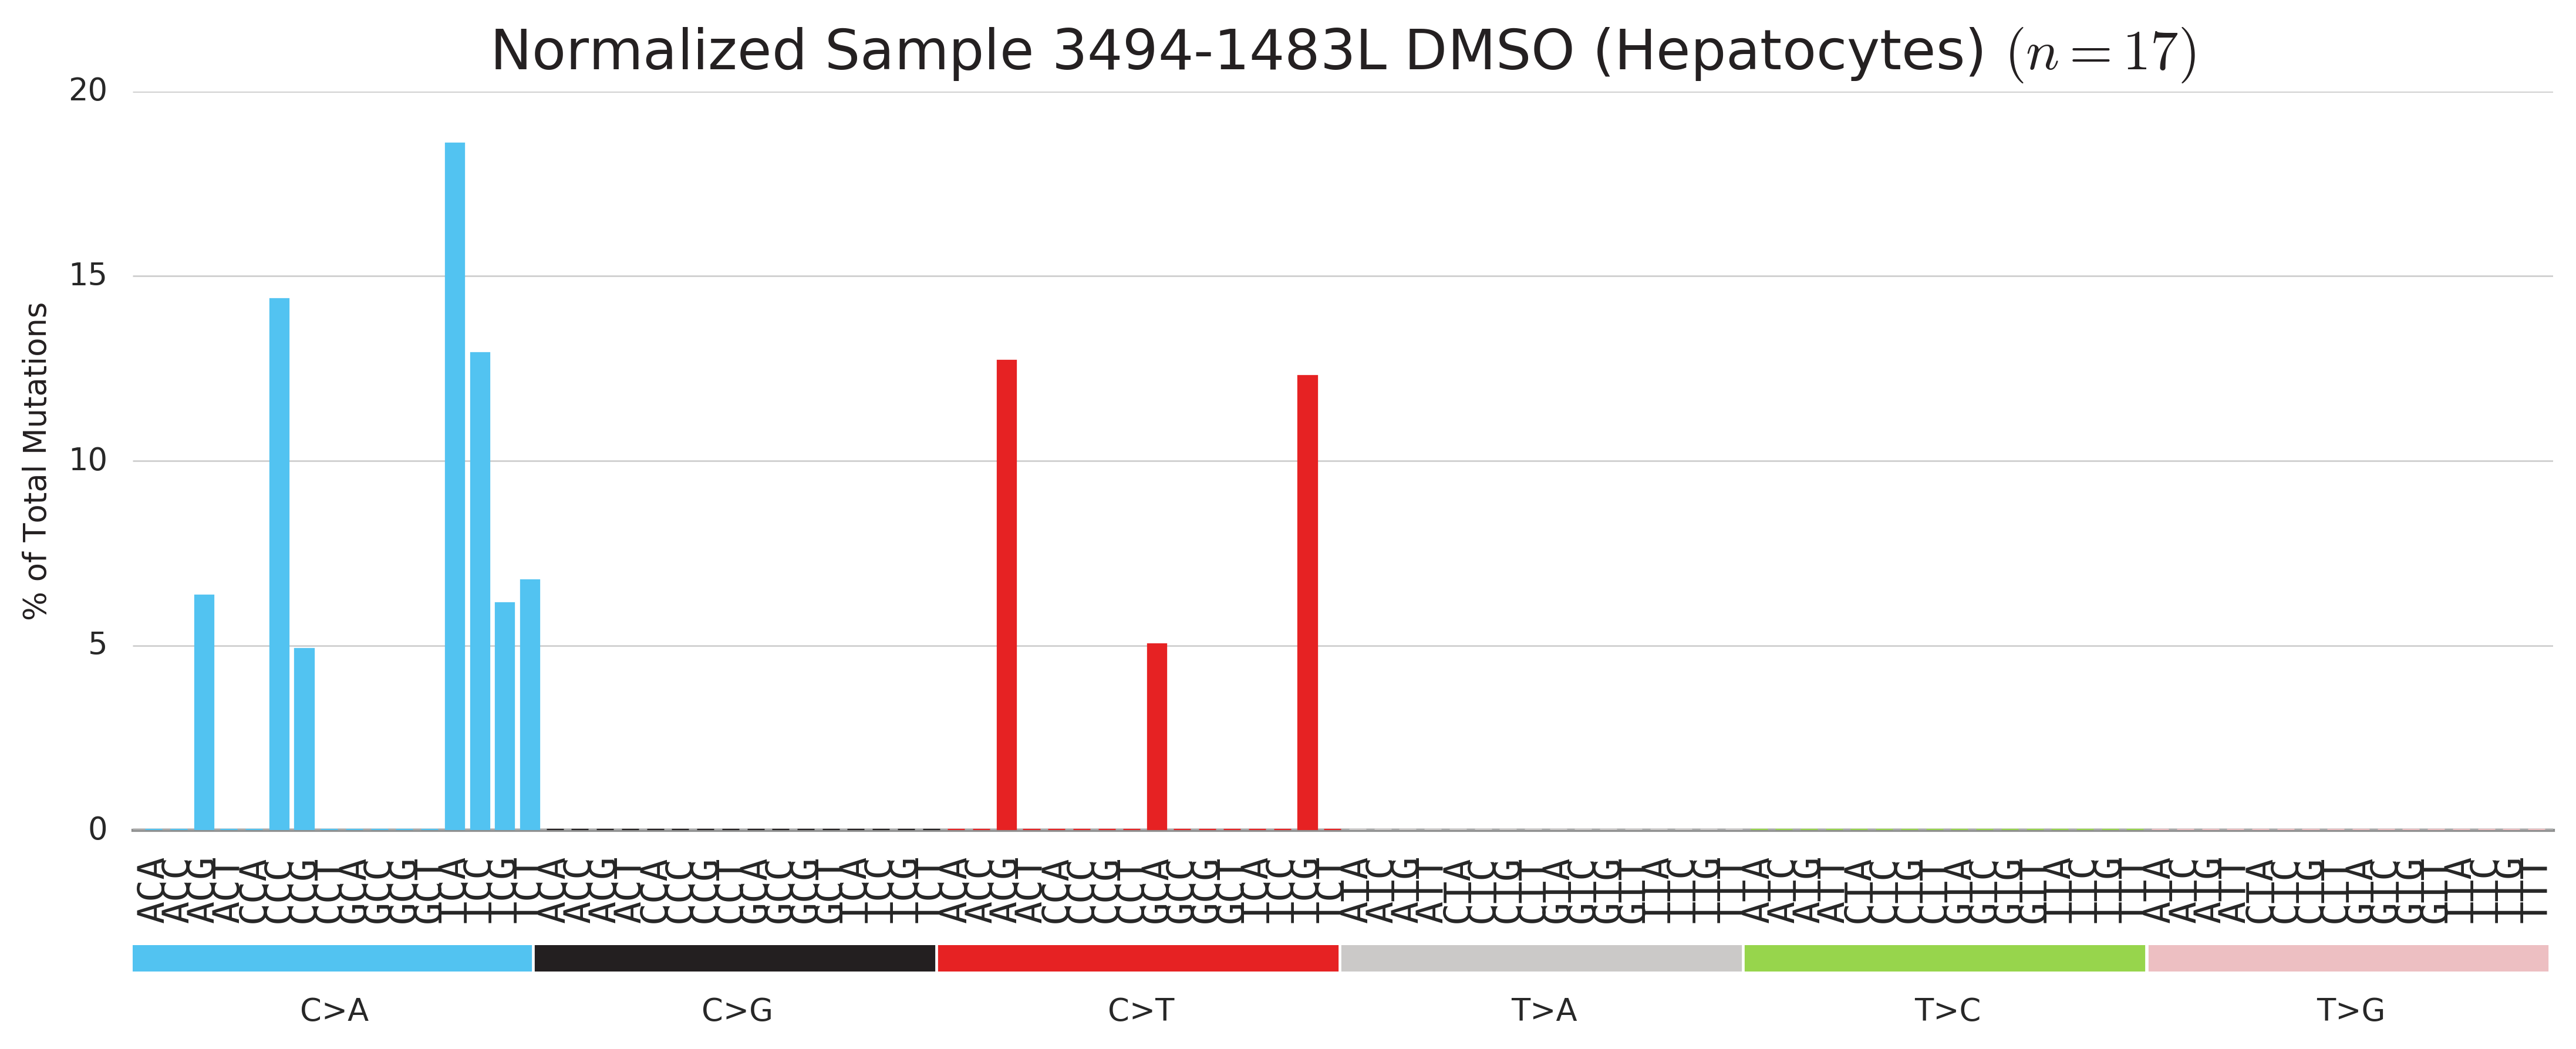

In [5]:
from siglib.utils import Spectrum
from siglib.figures import spectrum_map

for treatment in results:
    for id, mutations in results[treatment].items():
        spectrum = Spectrum(notation=notation, kmer=3)
        for mutation in set(mutations):
            spectrum[str(mutation.substitution), str(mutation.context)] += 1
        title = 'Normalized Sample {} {} $(n={})$\n\n'.format(id, treatment, spectrum.variant_total)
        spectrum_map(x=1, y=1,
                     heights=[[x * 100 for x in spectrum.normalized_proportion(j.normal())]],
                     xlabels=[spectrum.contexts],
                     labels=sorted(set(spectrum.sub_types)),
                     titles=[title])

AFB1 Tumor
[0.019382406436892912, 0.006202370059805732, 0.042382862075339166, 0.021333655407049915, 0.021090997715216175, 0.02399029928792783, 0.04365616694455537, 0.010961085019484267, 0.047610704093442674, 0.026938259793647775, 0.0500022530102316, 0.019181898784097467, 0.01550592514951433, 0.01436707188994548, 0.030761754732101007, 0.018808962459470044, 0.01550592514951433, 0.009303555089708598, 0.007063810345889861, 0.004266731081409983, 0.021090997715216175, 0.01999191607327319, 0.013642552170173551, 0.021922170038968535, 0.0028006296525554517, 0.008081477938094333, 0.009524238668615542, 0.002740271254871067, 0.023258887724271492, 0.01436707188994548, 0.013671890992044893, 0.018808962459470044, 0.011629443862135746, 0.0, 0.042382862075339166, 0.008533462162819966, 0.006025999347204622, 0.003998383214654638, 0.024556593906312395, 0.0036536950064947555, 0.0028006296525554517, 0.01077530391745911, 0.04762119334307772, 0.005480542509742134, 0.005168641716504777, 0.03950944769735007, 0.

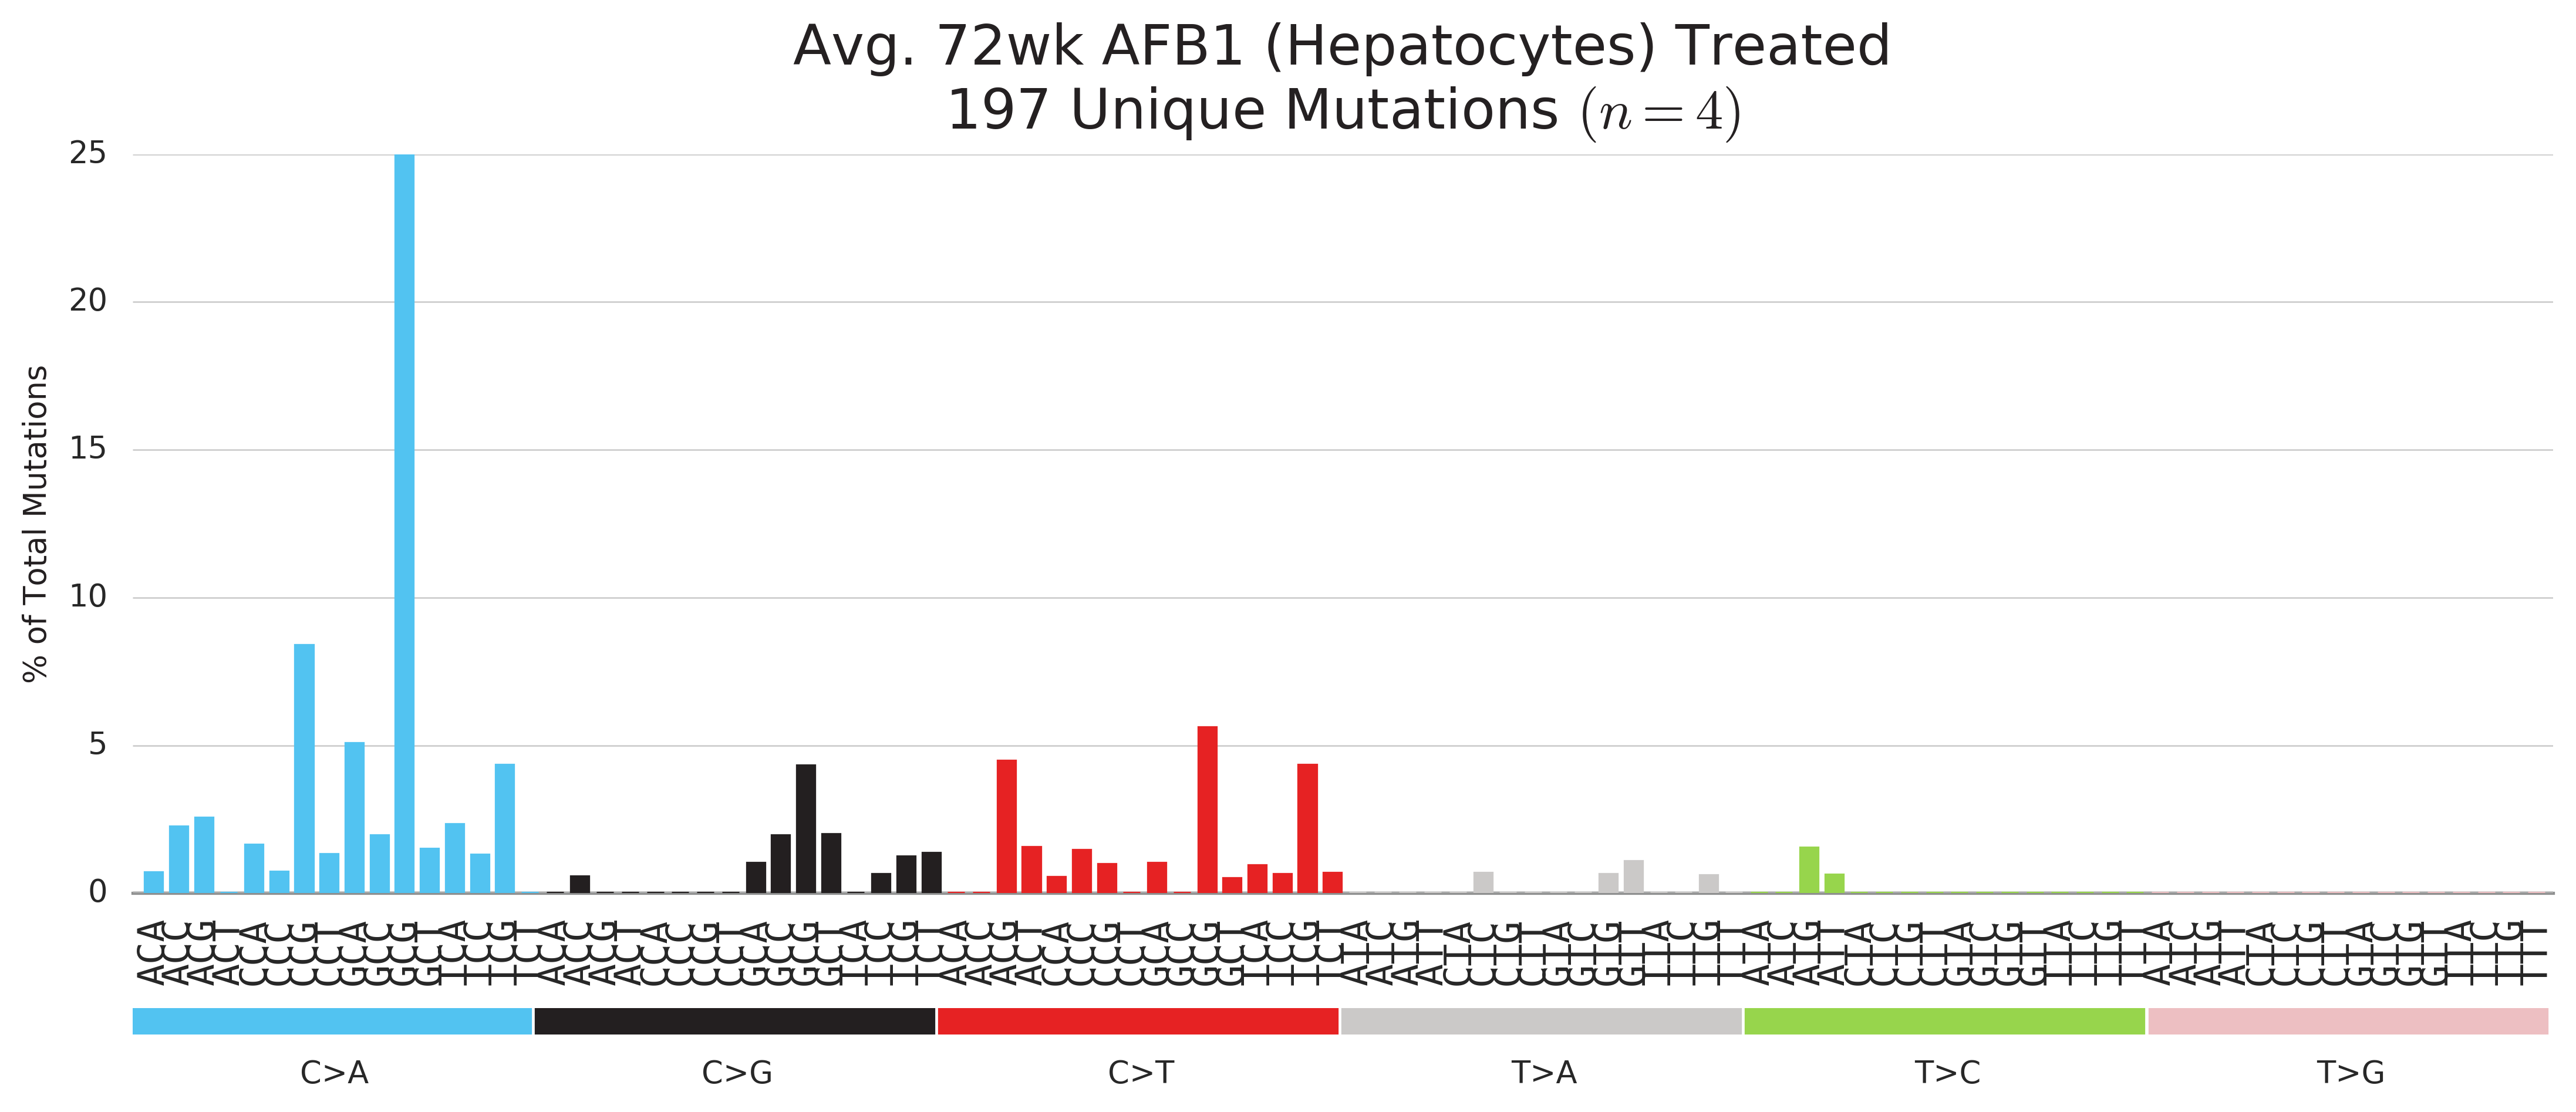

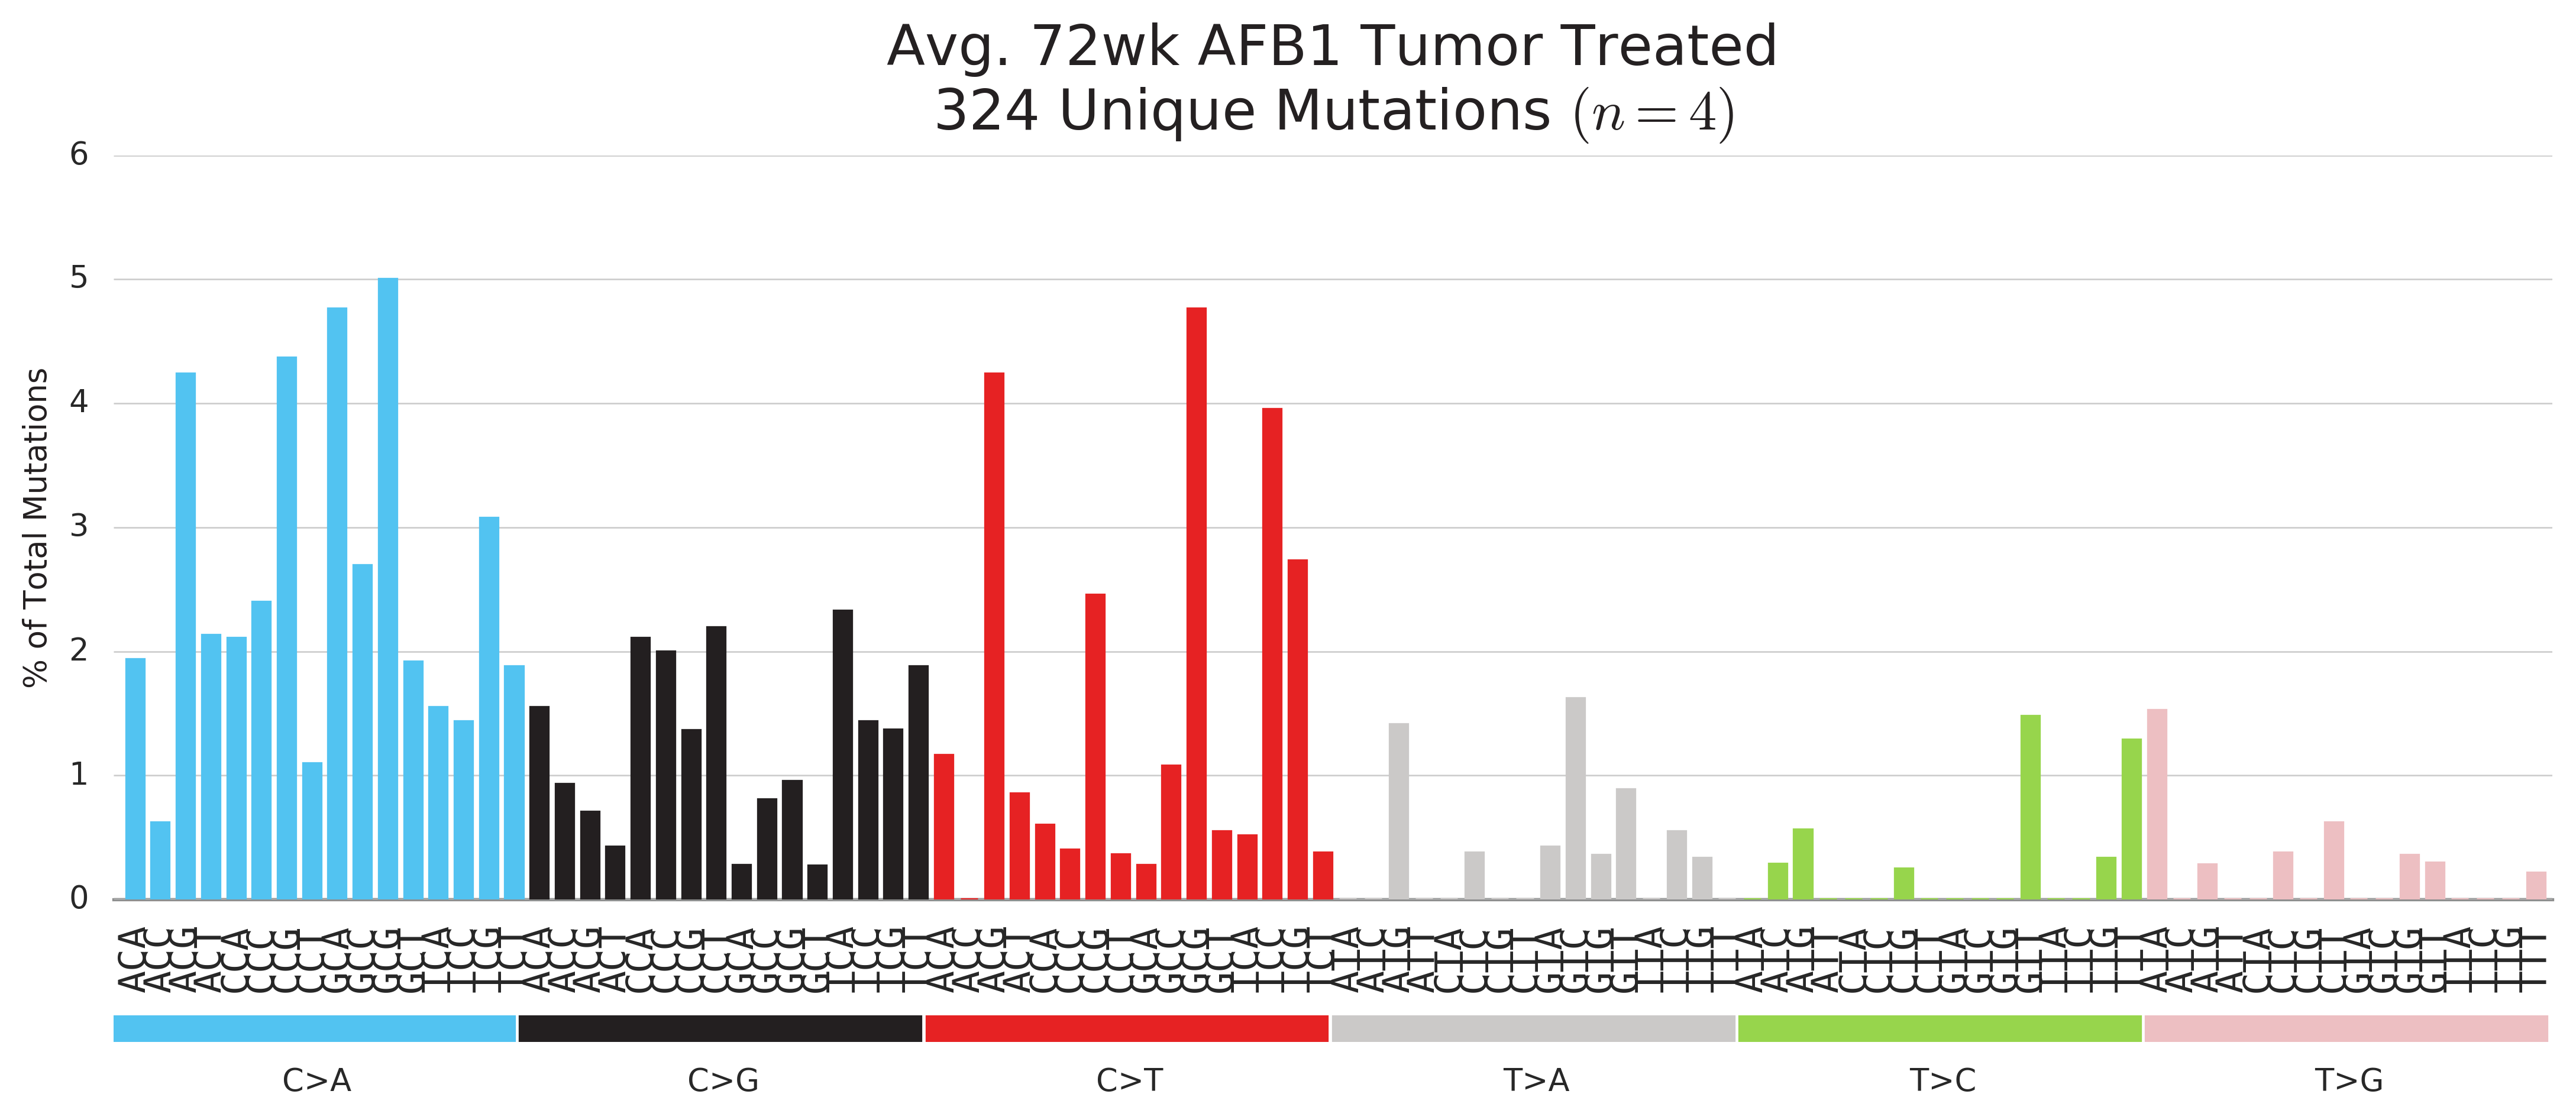

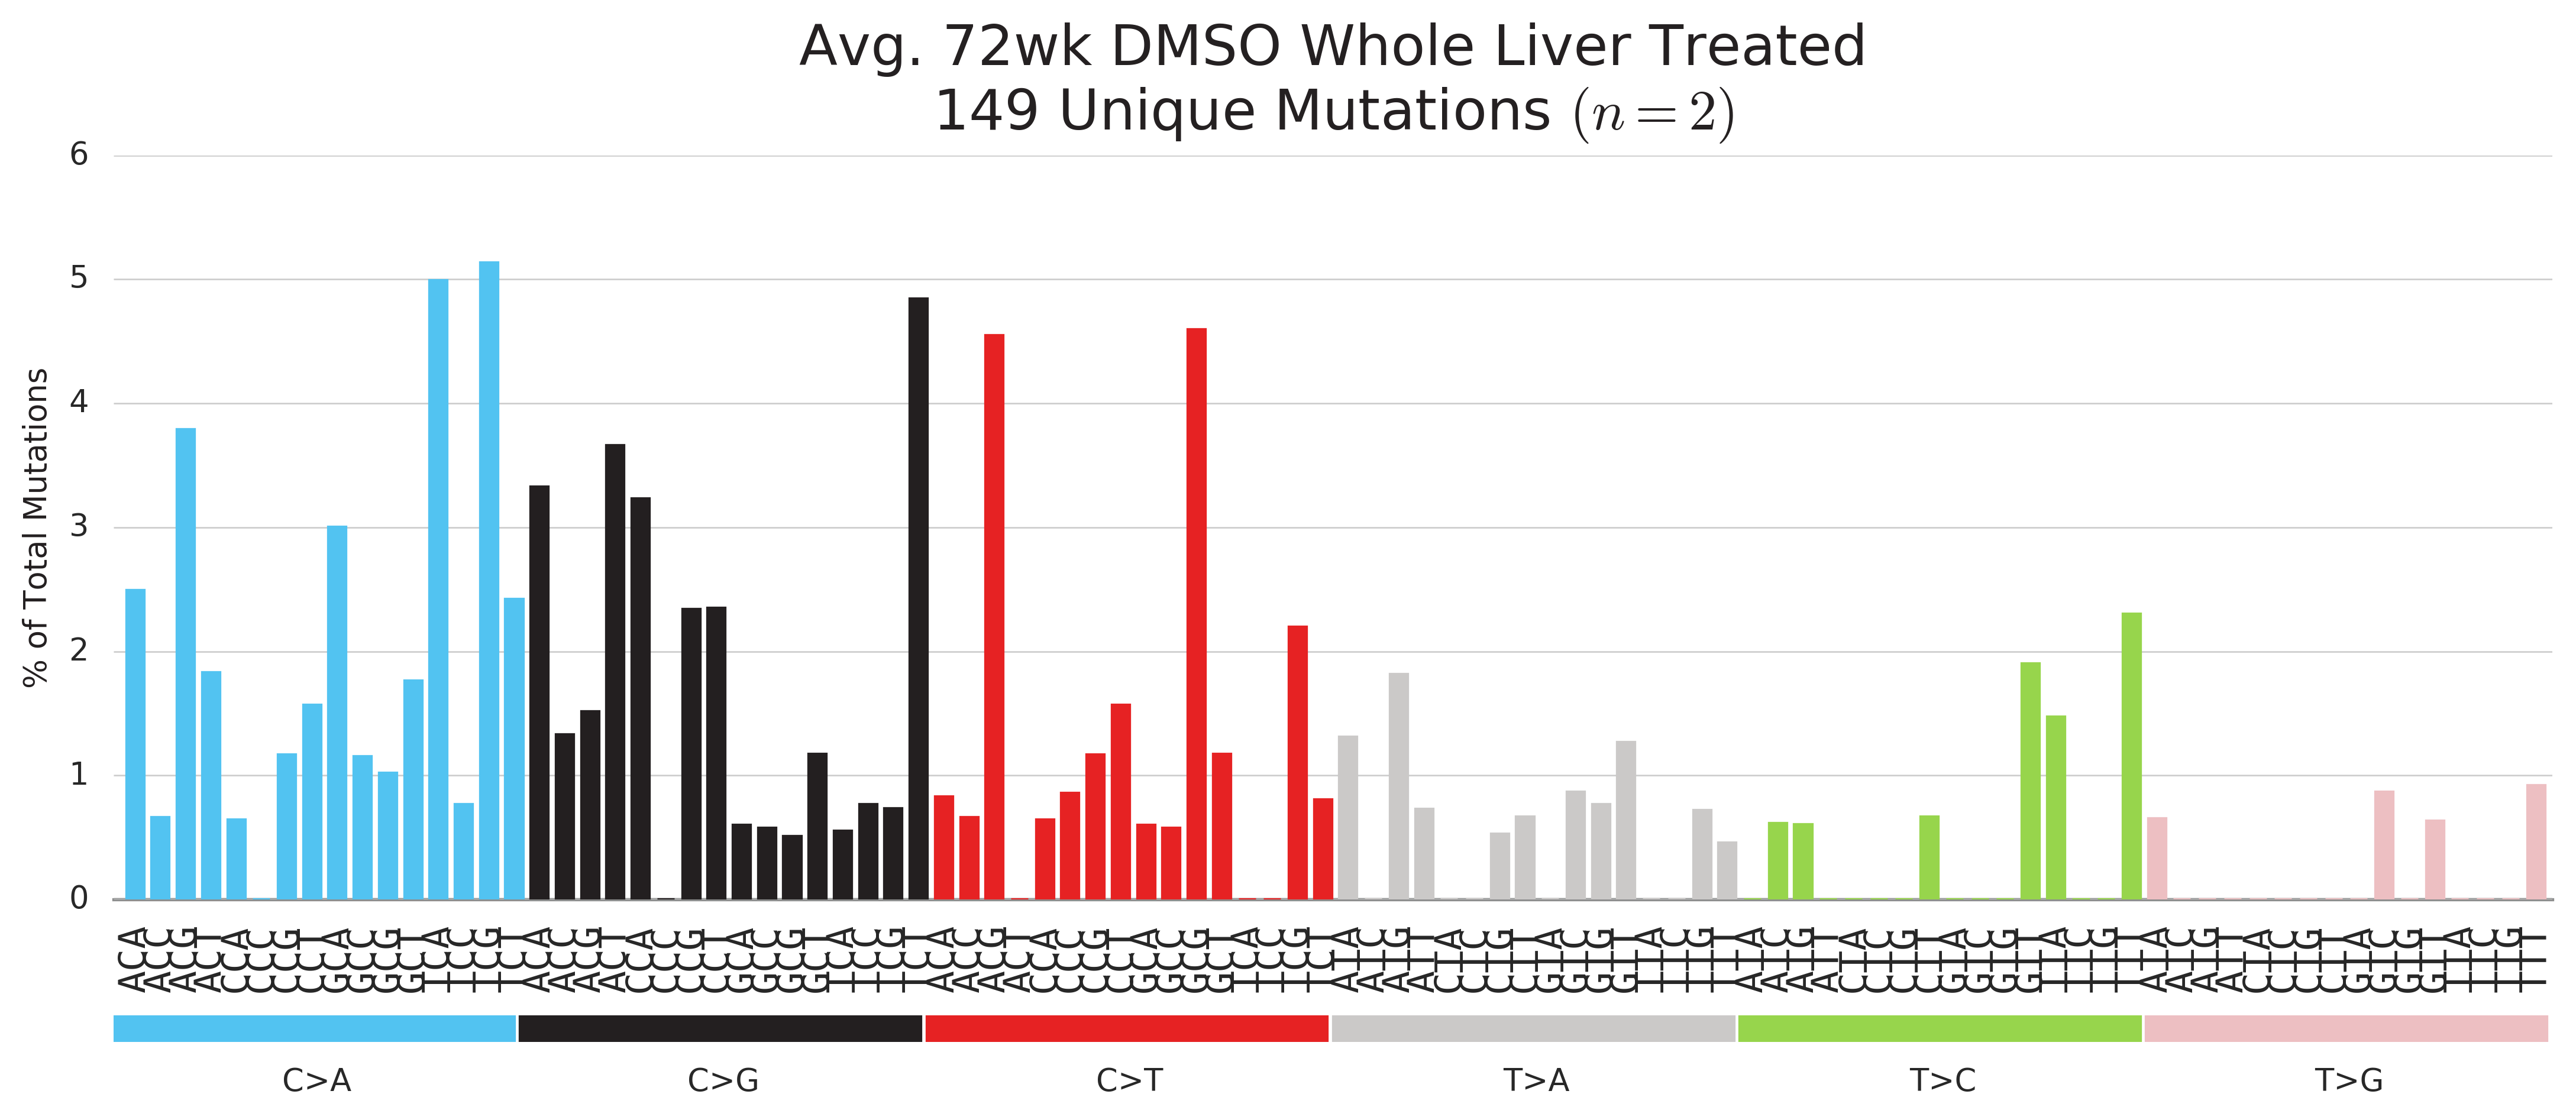

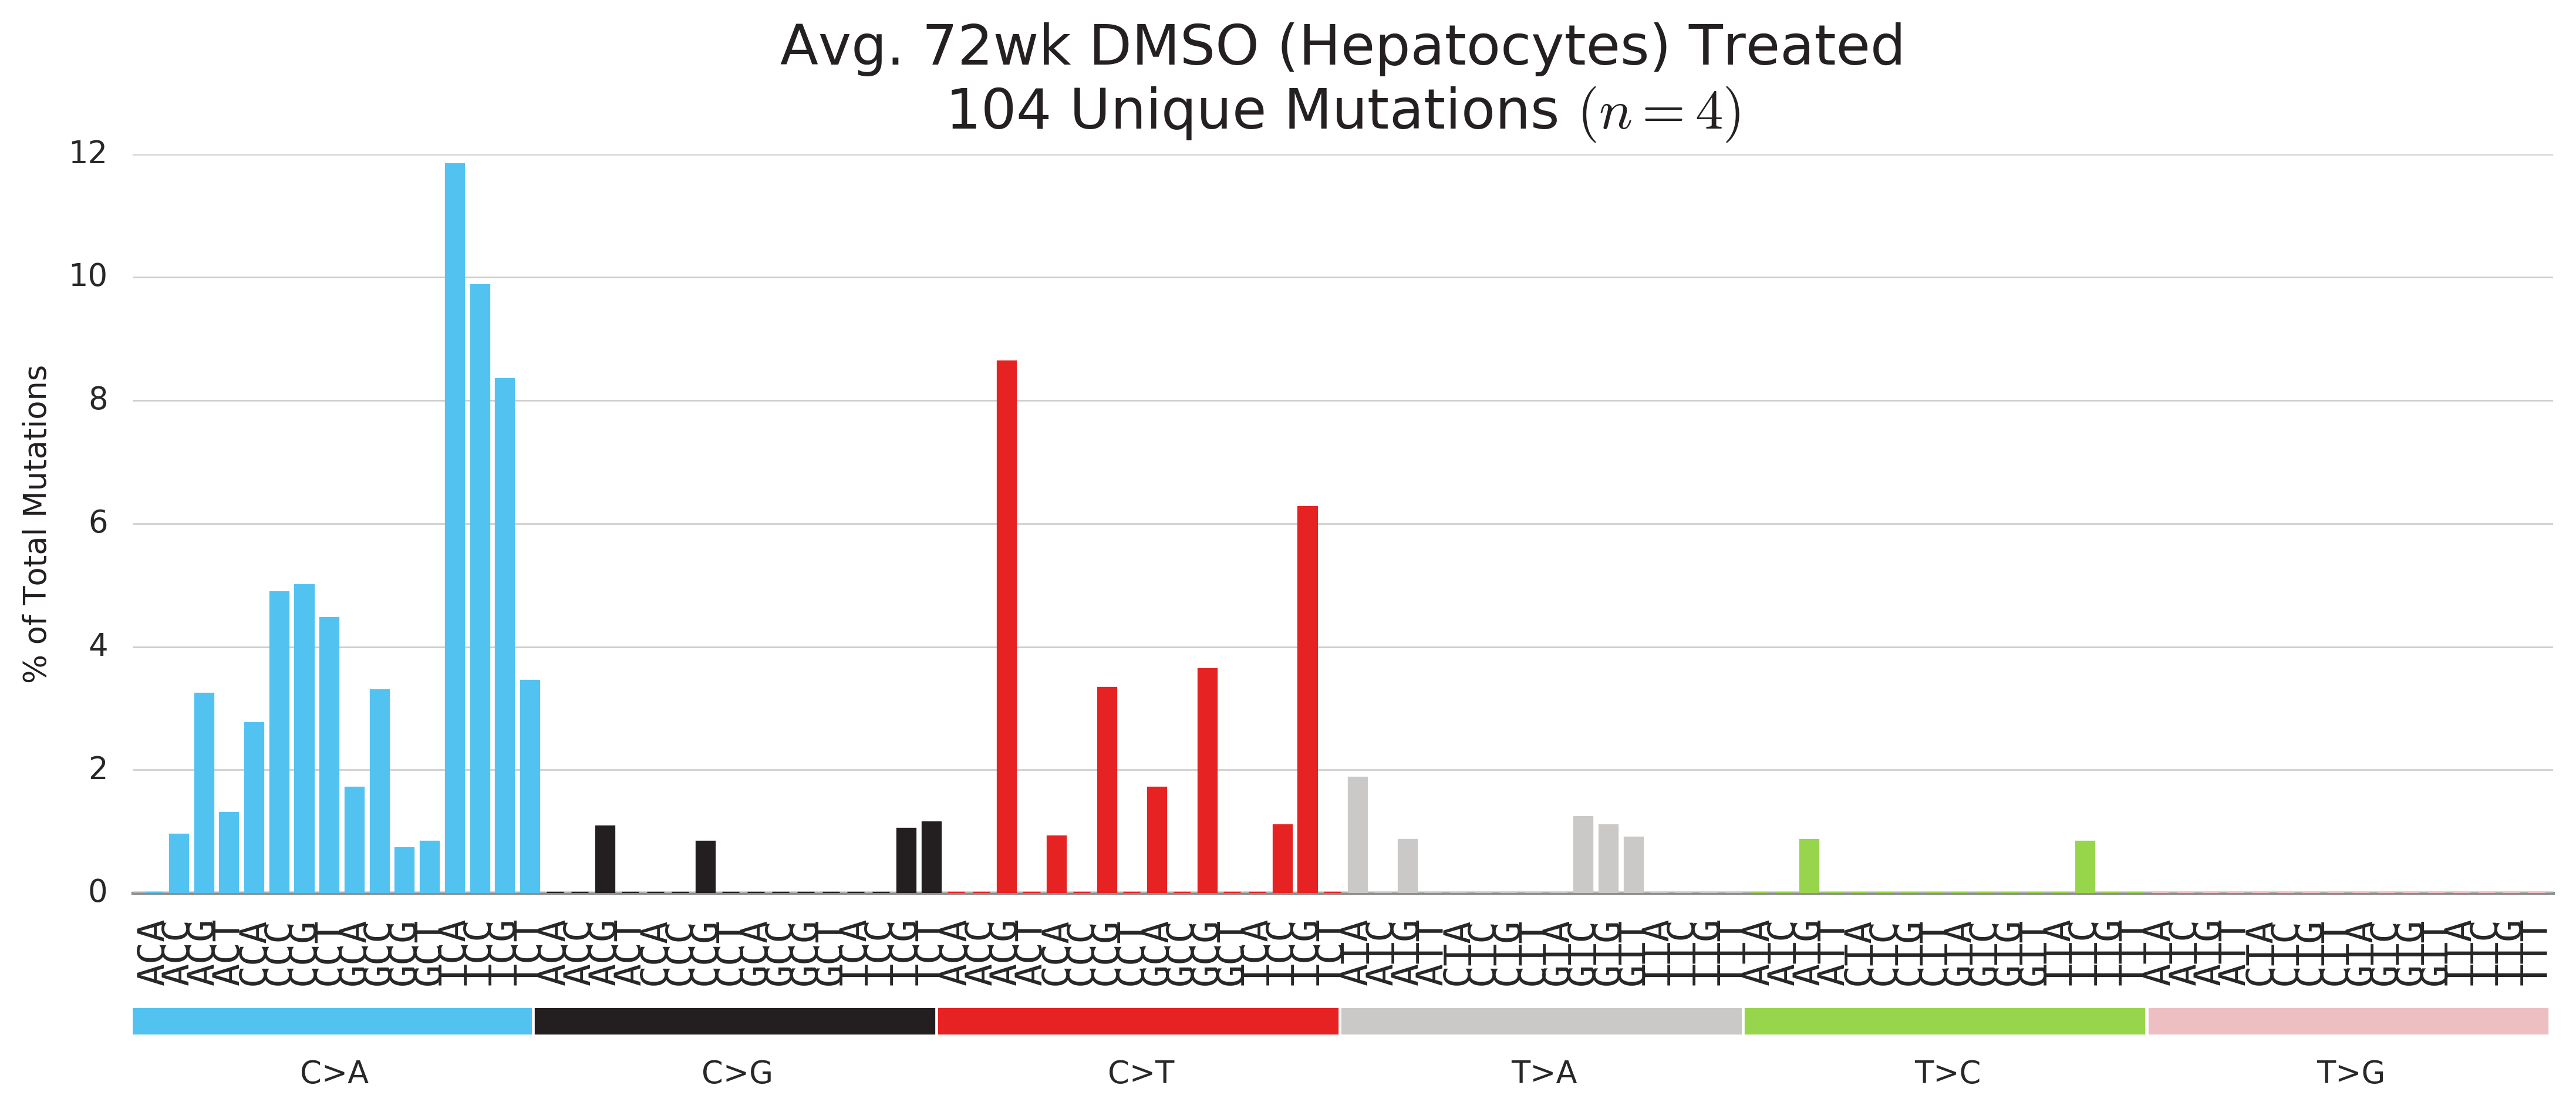

In [11]:
import matplotlib.pyplot as plt

filenames = {
    'AFB1 Tumor': 'A72T',
    'DMSO Whole Liver': 'D72',
    'AFB1 (Hepatocytes)': 'A72H',
    'DMSO (Hepatocytes)': 'D72H'
}

for treatment in results.keys():
    outfile = filenames[treatment]
    full_sum = Spectrum(notation=notation)
    samples = 0
    for id, mutations in results[treatment].items():
        samples += 1
        for mutation in set(mutations):
            full_sum[str(mutation.substitution), str(mutation.context)] += 1

    title = 'Avg. 72wk {} Treated\n{} Unique Mutations $(n={})$\n\n'.format(treatment, full_sum.variant_total, samples)
    spectrum_map(x=1, y=1,
                 heights=[[x * 100 for x in full_sum.normalized_proportion(j.normal())]],
                 xlabels=[full_sum.contexts],
                 labels=sorted(set(full_sum.sub_types)),
                 titles=[title])
    plt.savefig('{}.pdf'.format(outfile))